In [2]:
%pip install scikit-network
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import networkx as nx
import sklearn
import sknetwork as skn
from pathlib import Path
from tqdm import tqdm

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 1.1 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.7 MB 1.3 MB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 1.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.7 MB 1.6 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.7 MB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 1.5 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


## **Question 2 :  Social Network Analysis with the Facebook100 Dataset**

### (a) 

In [3]:
networks_selected = ['Caltech36', 'MIT8', 'Johns Hopkins55']
net1 = nx.read_gml(f'data/{networks_selected[0]}.gml')
net2 = nx.read_gml(f'data/{networks_selected[1]}.gml')
net3 = nx.read_gml(f'data/{networks_selected[2]}.gml')

In [4]:
net1.number_of_edges()
nx.read_gml(f'data/{networks_selected[2]}.gml')

In [4]:
"""networks = []
#for i in range(99):
    try:
        all_net = networks.append(nx.read_gml(f'data/{networks_selected[i]}.gml'))
    except:
        print(i)

all_net"""

"networks = []\n#for i in range(99):\n    try:\n        all_net = networks.append(nx.read_gml(f'data/{networks_selected[i]}.gml'))\n    except:\n        print(i)\n\nall_net"

In [5]:
from collections import Counter

def degree_distribution(G, normalize=False):
    """Retourne {degré: effectif} ou proportions si normalize=True."""
    degs = [d for _, d in G.degree()]
    counts = Counter(degs)
    result = dict(sorted(counts.items()))
    if normalize:
        n = G.number_of_nodes() or 1
        result = {k: v / n for k, v in result.items()}
    return result

def degree_summary(G):
    """Statistiques simples sur les degrés."""
    degs = [d for _, d in G.degree()]
    return {
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "min": min(degs) if degs else 0,
        "max": max(degs) if degs else 0,
        "mean": float(np.mean(degs)) if degs else 0.0,
        "median": float(np.median(degs)) if degs else 0.0,
    }    

In [ ]:
degree_distribution(net1)


{1: 35,
 2: 32,
 3: 15,
 4: 12,
 5: 10,
 6: 8,
 7: 10,
 8: 8,
 9: 21,
 10: 6,
 11: 14,
 12: 11,
 13: 10,
 14: 12,
 15: 8,
 16: 9,
 17: 3,
 18: 8,
 19: 6,
 20: 11,
 21: 5,
 22: 13,
 23: 11,
 24: 8,
 25: 5,
 26: 9,
 27: 6,
 28: 11,
 29: 5,
 30: 16,
 31: 5,
 32: 9,
 33: 10,
 34: 8,
 35: 12,
 36: 4,
 37: 7,
 38: 9,
 39: 11,
 40: 12,
 41: 12,
 42: 6,
 43: 5,
 44: 8,
 45: 13,
 46: 6,
 47: 8,
 48: 9,
 49: 7,
 50: 5,
 51: 8,
 52: 4,
 53: 6,
 54: 6,
 55: 4,
 56: 9,
 57: 6,
 58: 5,
 59: 8,
 60: 4,
 61: 8,
 62: 7,
 63: 6,
 64: 6,
 65: 6,
 66: 5,
 67: 7,
 68: 8,
 69: 2,
 70: 5,
 71: 3,
 72: 2,
 73: 3,
 74: 2,
 75: 4,
 76: 5,
 77: 4,
 79: 8,
 80: 6,
 81: 4,
 82: 4,
 83: 1,
 84: 4,
 85: 3,
 86: 4,
 87: 1,
 88: 3,
 89: 2,
 90: 1,
 92: 2,
 93: 1,
 94: 1,
 95: 3,
 96: 2,
 97: 2,
 98: 2,
 99: 2,
 100: 4,
 102: 4,
 103: 2,
 104: 4,
 105: 2,
 106: 1,
 107: 1,
 108: 3,
 109: 2,
 110: 1,
 113: 1,
 114: 1,
 115: 2,
 117: 2,
 119: 2,
 120: 2,
 121: 2,
 124: 2,
 126: 1,
 132: 3,
 135: 1,
 136: 1,
 137: 1,
 138

In [6]:
degree_summary(net1)

{'nodes': 769,
 'edges': 16656,
 'min': 1,
 'max': 248,
 'mean': 43.3185955786736,
 'median': 36.0}

In [ ]:
degree_distribution(net2)


{1: 302,
 2: 165,
 3: 109,
 4: 93,
 5: 92,
 6: 95,
 7: 90,
 8: 76,
 9: 57,
 10: 72,
 11: 55,
 12: 55,
 13: 67,
 14: 51,
 15: 50,
 16: 60,
 17: 46,
 18: 37,
 19: 60,
 20: 32,
 21: 47,
 22: 52,
 23: 44,
 24: 49,
 25: 54,
 26: 59,
 27: 49,
 28: 51,
 29: 52,
 30: 52,
 31: 42,
 32: 39,
 33: 34,
 34: 46,
 35: 52,
 36: 49,
 37: 38,
 38: 41,
 39: 39,
 40: 52,
 41: 52,
 42: 51,
 43: 43,
 44: 50,
 45: 39,
 46: 28,
 47: 49,
 48: 35,
 49: 44,
 50: 41,
 51: 24,
 52: 48,
 53: 37,
 54: 46,
 55: 22,
 56: 39,
 57: 28,
 58: 29,
 59: 33,
 60: 33,
 61: 26,
 62: 38,
 63: 39,
 64: 30,
 65: 31,
 66: 39,
 67: 35,
 68: 33,
 69: 36,
 70: 37,
 71: 35,
 72: 28,
 73: 29,
 74: 32,
 75: 37,
 76: 44,
 77: 34,
 78: 23,
 79: 26,
 80: 31,
 81: 25,
 82: 28,
 83: 27,
 84: 24,
 85: 36,
 86: 25,
 87: 39,
 88: 18,
 89: 39,
 90: 22,
 91: 27,
 92: 30,
 93: 27,
 94: 23,
 95: 20,
 96: 23,
 97: 24,
 98: 23,
 99: 28,
 100: 37,
 101: 22,
 102: 20,
 103: 20,
 104: 22,
 105: 14,
 106: 27,
 107: 19,
 108: 24,
 109: 24,
 110: 22,
 111:

In [ ]:
degree_distribution(net3)


{1: 197,
 2: 128,
 3: 75,
 4: 76,
 5: 63,
 6: 75,
 7: 55,
 8: 62,
 9: 78,
 10: 51,
 11: 45,
 12: 40,
 13: 50,
 14: 54,
 15: 32,
 16: 37,
 17: 39,
 18: 52,
 19: 51,
 20: 41,
 21: 39,
 22: 40,
 23: 40,
 24: 49,
 25: 50,
 26: 40,
 27: 49,
 28: 34,
 29: 41,
 30: 37,
 31: 38,
 32: 45,
 33: 42,
 34: 39,
 35: 35,
 36: 40,
 37: 34,
 38: 47,
 39: 46,
 40: 29,
 41: 37,
 42: 35,
 43: 41,
 44: 36,
 45: 39,
 46: 42,
 47: 41,
 48: 22,
 49: 33,
 50: 34,
 51: 34,
 52: 29,
 53: 28,
 54: 39,
 55: 31,
 56: 33,
 57: 38,
 58: 34,
 59: 33,
 60: 41,
 61: 35,
 62: 25,
 63: 22,
 64: 29,
 65: 26,
 66: 25,
 67: 45,
 68: 30,
 69: 27,
 70: 22,
 71: 33,
 72: 24,
 73: 30,
 74: 22,
 75: 25,
 76: 28,
 77: 39,
 78: 19,
 79: 31,
 80: 23,
 81: 15,
 82: 28,
 83: 22,
 84: 28,
 85: 18,
 86: 25,
 87: 26,
 88: 19,
 89: 26,
 90: 32,
 91: 17,
 92: 21,
 93: 18,
 94: 27,
 95: 23,
 96: 18,
 97: 22,
 98: 20,
 99: 23,
 100: 17,
 101: 21,
 102: 14,
 103: 18,
 104: 18,
 105: 21,
 106: 26,
 107: 20,
 108: 19,
 109: 19,
 110: 13,
 111: 

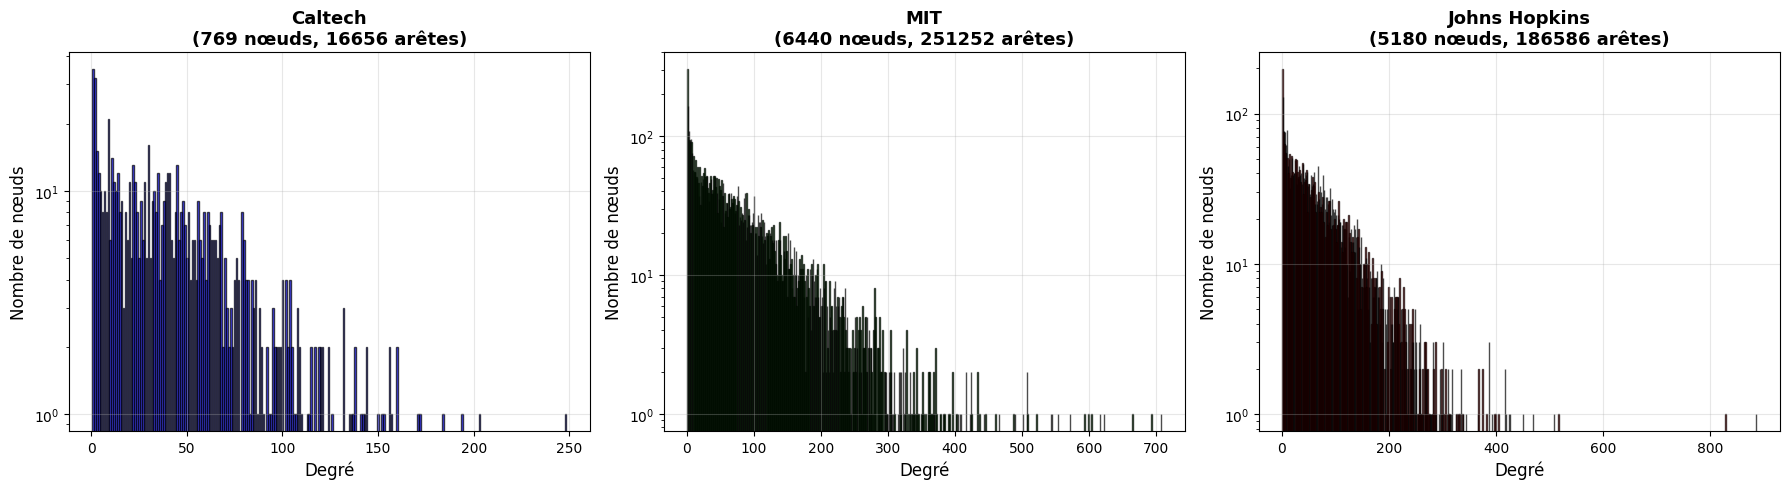

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

networks = [(net1, 'Caltech', 'blue'), (net2, 'MIT', 'green'), (net3, 'Johns Hopkins', 'red')]

for idx, (net, name, color) in enumerate(networks):
    dist = degree_distribution(net)
    degrees = list(dist.keys())
    counts = list(dist.values())
    
    axes[idx].bar(degrees, counts, color=color, alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel('Degré', fontsize=12)
    axes[idx].set_ylabel('Nombre de nœuds', fontsize=12)
    axes[idx].set_title(f'{name}\n({net.number_of_nodes()} nœuds, {net.number_of_edges()} arêtes)', 
                        fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_yscale('log')  # Échelle log pour mieux voir la distribution

plt.tight_layout()
plt.show()

### (b)

Nous allons dans un premier temps afficher un sous-graphe du graphe principal car le graphe complet est trop grand pour une visualisation claire. 

Nous allons choisir **le top 300** noeuds connectés de **Caltech** et **le top 400** noeuds connectés de **MIT** et **Johns Hopkins** pour cette visualisation.

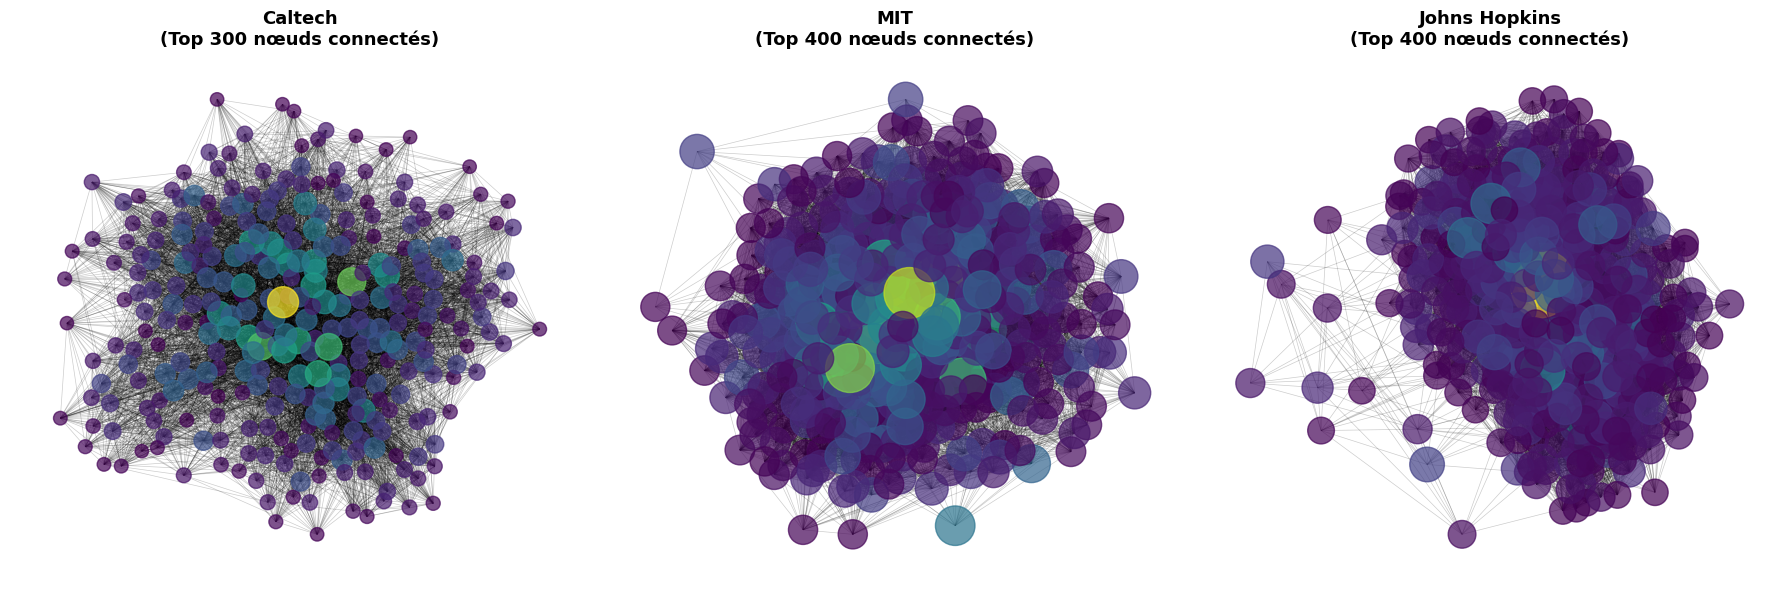

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

networks = [(net1, 'Caltech', 300), (net2, 'MIT', 400), (net3, 'Johns Hopkins', 400)]

for idx, (net, name, sample_size) in enumerate(networks):

    degrees = dict(net.degree())
    top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:sample_size]
    subgraph = net.subgraph(top_nodes)
    
    # Layout spring pour une meilleure visualisation
    pos = nx.spring_layout(subgraph, k=0.5, iterations=50, seed=42)
    
    # Taille des nœuds proportionnelle au degré
    node_sizes = [degrees[node] * 2 for node in subgraph.nodes()]
    
    # Dessiner le graphe
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, 
                          node_color=list(degrees[node] for node in subgraph.nodes()),
                          cmap='viridis', alpha=0.7, ax=axes[idx])
    nx.draw_networkx_edges(subgraph, pos, alpha=0.2, width=0.5, ax=axes[idx])
    
    axes[idx].set_title(f'{name}\n(Top {sample_size} nœuds connectés)', 
                       fontsize=13, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

Implémentation du code pour la question 2 (b) :

In [11]:
def complete_clustering_analysis(G, name="Network"):
    """Compute clustering coefficients and edge density for a network."""
    
    # Clustering metrics
    avg_clustering = nx.average_clustering(G)  # Mean local clustering coefficient
    transitivity = nx.transitivity(G)  # Global clustering coefficient
    
    # Edge density
    n = G.number_of_nodes()
    m = G.number_of_edges()
    max_edges = n * (n - 1) / 2  # For undirected graph
    density = nx.density(G)  # or manually: 2 * m / (n * (n - 1))
    
    return {
        "network": name,
        "nodes": n,
        "edges": m,
        "mean_local_clustering": avg_clustering,
        "global_clustering": transitivity,
        "edge_density": density,
        "is_sparse": density < 0.1  # Common threshold for sparsity
    }

# Analyze all three networks
results = []
for net, name in [(net1, 'Caltech'), (net2, 'MIT'), (net3, 'Johns Hopkins')]:
    results.append(complete_clustering_analysis(net, name))

# Display results
df_analysis = pd.DataFrame(results)
print(df_analysis)

         network  nodes   edges  mean_local_clustering  global_clustering  \
0        Caltech    769   16656               0.409294           0.291283   
1            MIT   6440  251252               0.271219           0.180288   
2  Johns Hopkins   5180  186586               0.268393           0.193161   

   edge_density  is_sparse  
0      0.056404       True  
1      0.012118       True  
2      0.013910       True  


### (c)

Nous allons tracer un scatter plot du degré versus le coefficient de clustering local pour chaque réseau pour analyser la relation entre la connectivité d'un nœud et son niveau de clustering.

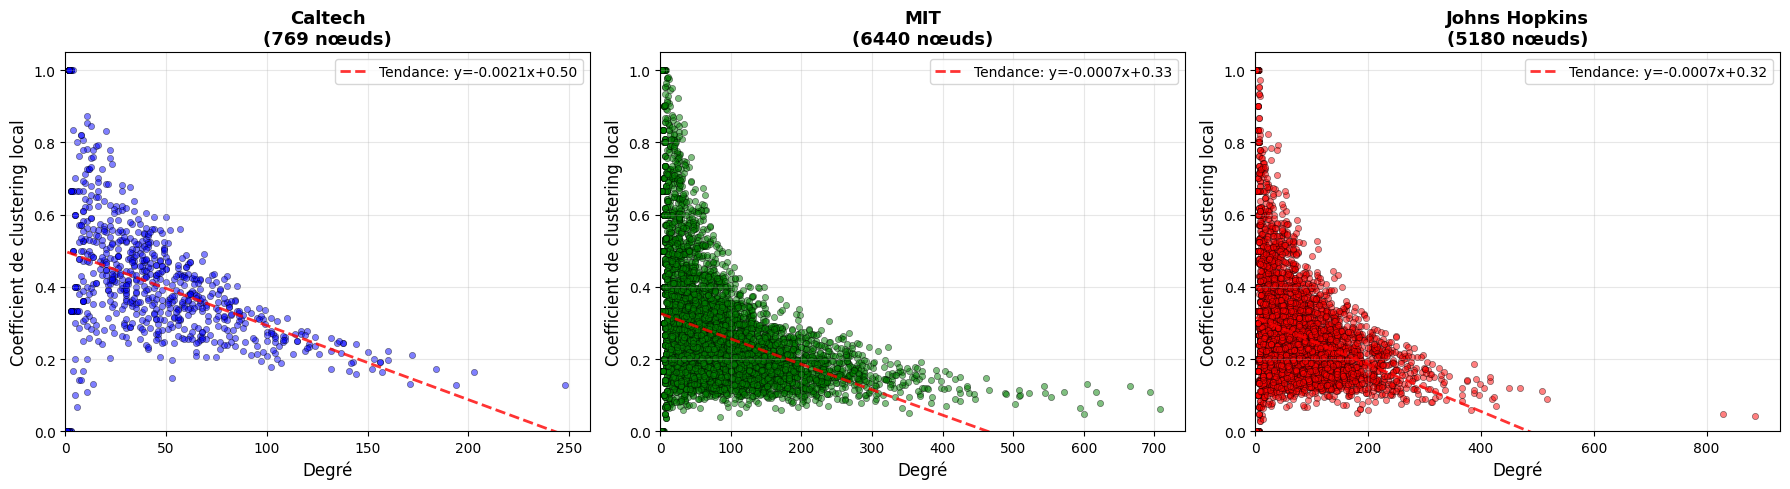

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

networks = [(net1, 'Caltech', 'blue'), (net2, 'MIT', 'green'), (net3, 'Johns Hopkins', 'red')]

for idx, (net, name, color) in enumerate(networks):
    # Calculer les degrés et les coefficients de clustering locaux
    degrees = dict(net.degree())
    clustering = nx.clustering(net)
    
    # Extraire les valeurs pour le scatter plot
    degree_values = [degrees[node] for node in net.nodes()]
    clustering_values = [clustering[node] for node in net.nodes()]
    
    # Créer le scatter plot
    axes[idx].scatter(degree_values, clustering_values, alpha=0.5, s=20, color=color, edgecolors='black', linewidth=0.5)
    axes[idx].set_xlabel('Degré', fontsize=12)
    axes[idx].set_ylabel('Coefficient de clustering local', fontsize=12)
    axes[idx].set_title(f'{name}\n({net.number_of_nodes()} nœuds)', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim(left=0)
    axes[idx].set_ylim([0, 1.05])
    
    # Ajouter une ligne de tendance
    z = np.polyfit(degree_values, clustering_values, 1)
    p = np.poly1d(z)
    x_line = np.linspace(min(degree_values), max(degree_values), 100)
    axes[idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label=f'Tendance: y={z[0]:.4f}x+{z[1]:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## **Question 3 : Assortativity Analysis with the Facebook100 Dataset**

### (a)

In [ ]:
# Voir la composition d'un noeud
print("=== Attributs des nœuds ===")
print(net1.nodes(data=True))

=== Attributs des nœuds ===
[('0', {'student_fac': 1, 'gender': 1, 'major_index': 199, 'second_major': 0, 'dorm': 169, 'year': 2008, 'high_school': 3387}), ('1', {'student_fac': 1, 'gender': 1, 'major_index': 199, 'second_major': 0, 'dorm': 165, 'year': 2006, 'high_school': 3172}), ('2', {'student_fac': 1, 'gender': 2, 'major_index': 201, 'second_major': 0, 'dorm': 171, 'year': 2008, 'high_school': 9773}), ('3', {'student_fac': 2, 'gender': 2, 'major_index': 208, 'second_major': 210, 'dorm': 172, 'year': 2005, 'high_school': 50578}), ('4', {'student_fac': 1, 'gender': 2, 'major_index': 202, 'second_major': 0, 'dorm': 169, 'year': 2008, 'high_school': 11880}), ('5', {'student_fac': 1, 'gender': 1, 'major_index': 212, 'second_major': 0, 'dorm': 168, 'year': 2007, 'high_school': 4481}), ('6', {'student_fac': 1, 'gender': 0, 'major_index': 0, 'second_major': 0, 'dorm': 0, 'year': 0, 'high_school': 0}), ('7', {'student_fac': 1, 'gender': 2, 'major_index': 0, 'second_major': 0, 'dorm': 171, 

In [ ]:
def compute_assortativity(G, name):
    """Calcule l'assortativité pour tous les attributs d'un réseau."""
    results = {"network": name, "size": G.number_of_nodes()}
    
    # (i) Student/faculty status
    try:
        results["student_fac"] = nx.attribute_assortativity_coefficient(G, 'student_fac')
    except Exception:
        results["student_fac"] = None
    
    # (ii) Major
    try:
        results["major"] = nx.attribute_assortativity_coefficient(G, 'major_index')
    except Exception:
        results["major"] = None
    
    # (iii) Vertex degree (assortativité numérique)
    try:
        results["degree"] = nx.degree_assortativity_coefficient(G)
    except Exception:
        results["degree"] = None
    
    # (iv) Dorm
    try:
        results["dorm"] = nx.attribute_assortativity_coefficient(G, 'dorm')
    except Exception:
        results["dorm"] = None
    
    # (v) Gender
    try:
        results["gender"] = nx.attribute_assortativity_coefficient(G, 'gender')
    except Exception:
        results["gender"] = None
    
    return results

# Charger tous les graphes FB100 et calculer l'assortativité
assortativity_results = []
data_dir = Path('data')
gml_files = sorted(data_dir.glob('*.gml'))

for gml_path in gml_files:
    try:
        G = nx.read_gml(gml_path)
        assortativity_results.append(compute_assortativity(G, gml_path.stem))
    except Exception as exc:
        print(f"Skip {gml_path.name}: {exc}")

df_assortativity = pd.DataFrame(assortativity_results)
df_assortativity.head()

Visualisation de l'assortativité pour tous les graphes (couleur unique, sans labels de réseau).

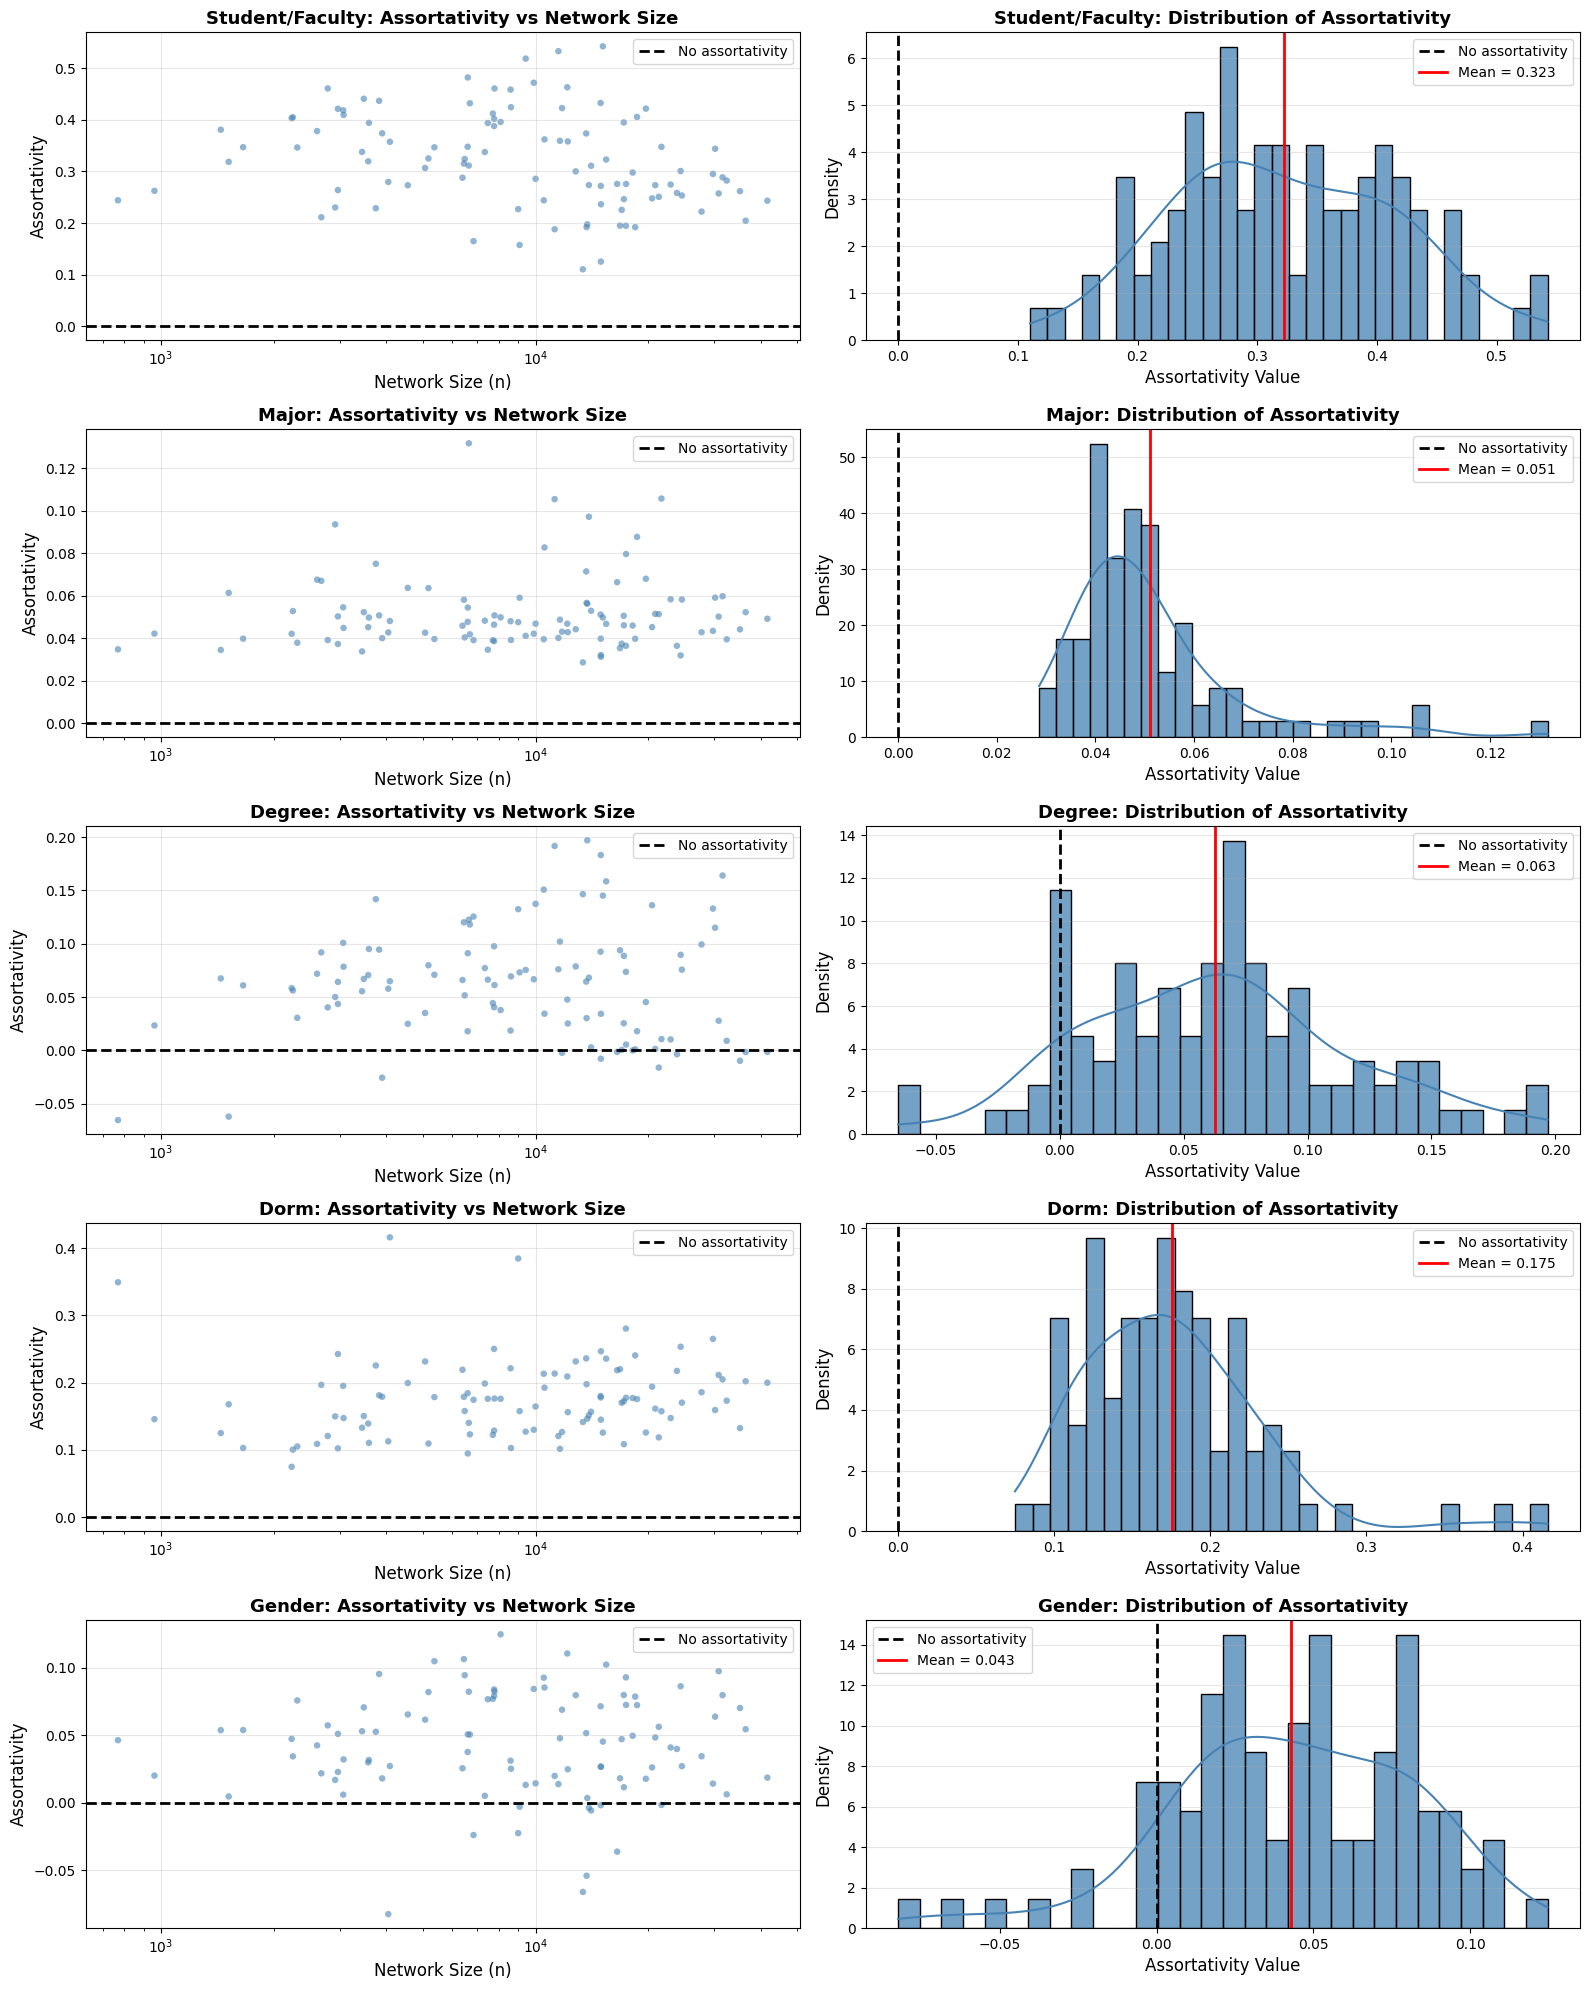

In [ ]:
# Visualisation : Assortativity vs Network Size et Distribution (tous les graphes)
import seaborn as sns
attributes = ['student_fac', 'major', 'degree', 'dorm', 'gender']
attribute_names = ['Student/Faculty', 'Major', 'Degree', 'Dorm', 'Gender']

fig, axes = plt.subplots(5, 2, figsize=(16, 20))

for idx, (attr, attr_name) in enumerate(zip(attributes, attribute_names)):
    ax1 = axes[idx, 0]
    sizes = df_assortativity['size'].to_numpy()
    assort_values = df_assortativity[attr].to_numpy()
    mask = ~pd.isna(assort_values)

    # Scatter (couleur unique, sans noms)
    ax1.scatter(sizes[mask], assort_values[mask], s=22, alpha=0.6, color='steelblue', edgecolors='none')
    ax1.axhline(y=0, color='black', linestyle='--', linewidth=2, label='No assortativity')
    ax1.set_xscale('log')
    ax1.set_xlabel('Network Size (n)', fontsize=12)
    ax1.set_ylabel('Assortativity', fontsize=12)
    ax1.set_title(f'{attr_name}: Assortativity vs Network Size', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Histogramme / distribution (KDE lissé, couleur unique, ligne à 0 et moyenne)
    ax2 = axes[idx, 1]
    valid_values = pd.Series(assort_values).dropna()
    if not valid_values.empty:
        sns.histplot(valid_values, bins=30, color='steelblue', kde=True, stat='density', edgecolor='black', alpha=0.75, ax=ax2)
        ax2.axvline(x=0, color='black', linestyle='--', linewidth=2, label='No assortativity')
        ax2.axvline(x=valid_values.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean = {valid_values.mean():.3f}')
        ax2.set_xlabel('Assortativity Value', fontsize=12)
        ax2.set_ylabel('Density', fontsize=12)
        ax2.set_title(f'{attr_name}: Distribution of Assortativity', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        ax2.legend()
    else:
        ax2.text(0.5, 0.5, 'No valid data', ha='center', va='center', fontsize=14)
        ax2.set_title(f'{attr_name}: Distribution of Assortativity', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## **Question 4 : Link prediction**


### (a)

L'article **“The Link Prediction Problem for Social Networks”** de ***Liben-Nowell, D. & Kleinberg, J.*** parle à propos de : 

- Le problème de **Link Prediction** consiste à prédire les futurs liens à partir de la topologie actuelle.

- Les mesures de **proximité structurale** sont efficaces, surtout celles basées sur **tous les chemins** (Katz, PageRank).

- Les réseaux de co‑auteurs présentent des propriétés small‑world qui rendent les prédictions non triviales.

- Le papier établit les fondations théoriques et un benchmark expérimental encore utilisé aujourd’hui.

### (b)

In [ ]:
from abc import ABC
from abc import abstractmethod
import itertools
import math
import networkx as nx
import numpy as np
import progressbar

class LinkPrediction(ABC):
    def __init__(self, graph):
        """Store the graph reference and its size."""
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        """Return the neighbors list of a node."""
        return list(self.graph.neighbors(v))

    @abstractmethod
    def fit(self, k=None, sample_size=None):
        """Compute scores for candidate edges and return a sorted list."""
        raise NotImplementedError("Fit must be implemented")


class _BaseScorer(LinkPrediction):
    def __init__(self, graph):
        super().__init__(graph)
        # Precompute neighbor sets and degrees for speed
        self._nbrs = {n: set(graph.neighbors(n)) for n in graph.nodes}
        self._deg = dict(graph.degree())

    def _non_edge_iterator(self, sample_size=None):
        pairs = nx.non_edges(self.graph)
        return itertools.islice(pairs, sample_size) if sample_size else pairs

    def _finalize(self, scores, k):
        # Sort by score descending, then by nodes for determinism
        scores.sort(key=lambda x: (-x[2], x[0], x[1]))
        if k:
            scores = scores[:k]
        self.scores_ = scores
        return scores


class CommonNeighbors(_BaseScorer):
    def __init__(self, graph):
        super().__init__(graph)

    def _score_pair(self, u, v):
        return len(self._nbrs[u] & self._nbrs[v])

    def fit(self, k=None, sample_size=None):
        scores = []
        for u, v in self._non_edge_iterator(sample_size):
            s = self._score_pair(u, v)
            scores.append((u, v, s))
        return self._finalize(scores, k)


class Jaccard(_BaseScorer):
    def __init__(self, graph):
        super().__init__(graph)

    def _score_pair(self, u, v):
        inter = self._nbrs[u] & self._nbrs[v]
        union = self._nbrs[u] | self._nbrs[v]
        return len(inter) / len(union) if union else 0.0

    def fit(self, k=None, sample_size=None):
        scores = []
        for u, v in self._non_edge_iterator(sample_size):
            s = self._score_pair(u, v)
            scores.append((u, v, s))
        return self._finalize(scores, k)


class AdamicAdar(_BaseScorer):
    def __init__(self, graph):
        super().__init__(graph)

    def _score_pair(self, u, v):
        inter = self._nbrs[u] & self._nbrs[v]
        score = 0.0
        for w in inter:
            dw = self._deg.get(w, 0)
            if dw > 1:
                score += 1.0 / math.log(dw)
        return score

    def fit(self, k=None, sample_size=None):
        scores = []
        for u, v in self._non_edge_iterator(sample_size):
            s = self._score_pair(u, v)
            scores.append((u, v, s))
        return self._finalize(scores, k)


### (c) 

Ici, nous allons implémenter trois prédicteurs de liens basés sur des mesures de similarité locale : Common Neighbors, Jaccard Coefficient et Adamic/Adar Index. 

Nous allons évaluer leurs performances sur le dataset Facebook100 en prenant un ensemble de graphe supérieur à 10 comme le sujet l'indique, on ne prendra pas énormement non plus pour cause de gpu et pour ne pas que cela met du temps. Nous allons donc prendre 15 graphes. 

On se base sur la procédure suivante : 


1) Choisir un graphe FB100 `G_fb(V, E)`.
2) Retirer aléatoirement une fraction f ∈ {0.05, 0.10, 0.15, 0.20} des arêtes → `E_removed`.
3) Pour chaque paire de nœuds (non-arête dans le graphe amputé), calculer le score du prédicteur `p` (Common Neighbors, Jaccard, Adamic/Adar) pour obtenir `E_predict`.
4) Trier les paires par score décroissant et prendre les k meilleurs `E_predict_top@k` (k = 50, 100, 200, 300, 400).
5) Mesurer |E_removed ∩ E_predict_top@k| puis calculer top@k, precision@k, recall@k. (top@k = % de vrais positifs dans le top-k).

In [ ]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm


def holdout_split(G, frac, seed=42):
    """Retire aléatoirement une fraction d'arêtes et retourne (G_train, edges_removed, rng)."""
    rng = np.random.default_rng(seed)
    edges = list(G.edges())
    m = max(1, int(len(edges) * frac))
    idx = rng.choice(len(edges), size=m, replace=False)
    edges_removed = [edges[i] for i in idx]
    G_train = G.copy()
    G_train.remove_edges_from(edges_removed)
    return G_train, edges_removed, rng


def evaluate_predictor(G, predictor_cls, frac_list, ks=(50, 100, 200, 300, 400), seed=42, negative_sample_size=None):
    """Évalue un prédicteur sur un graphe avec AUC et top/precision/recall@k."""
    rows = []
    for frac in frac_list:
        G_train, removed, rng = holdout_split(G, frac, seed=seed)
        predictor = predictor_cls(G_train)

        # Itérer sur les non-arêtes (échantillonnage si demandé)
        non_edges_iter = nx.non_edges(G_train)
        if negative_sample_size:
            non_edges_iter = itertools.islice(non_edges_iter, negative_sample_size)

        scores = []
        for u, v in non_edges_iter:
            s = predictor._score_pair(u, v)
            scores.append((u, v, s))
        scores.sort(key=lambda x: (-x[2], x[0], x[1]))

        removed_set = {tuple(sorted(e)) for e in removed}
        pos_scores = [s for u, v, s in scores if (min(u, v), max(u, v)) in removed_set]
        neg_scores = [s for u, v, s in scores if (min(u, v), max(u, v)) not in removed_set]
        auc = roc_auc_score([1] * len(pos_scores) + [0] * len(neg_scores), pos_scores + neg_scores) if pos_scores and neg_scores else np.nan

        for k in ks:
            k_eff = min(k, len(scores))
            topk = scores[:k_eff]
            tp = sum((min(u, v), max(u, v)) in removed_set for u, v, _ in topk)
            fp = k_eff - tp
            fn = len(removed) - tp

            rows.append({
                "predictor": predictor_cls.__name__,
                "frac_removed": frac,
                "k": k,
                "edges_removed": len(removed),
                "auc": auc,
                "top@k": tp / k_eff if k_eff else np.nan,
                "precision@k": tp / (tp + fp) if (tp + fp) else np.nan,
                "recall@k": tp / (tp + fn) if (tp + fn) else np.nan,
                "tp": tp, "fp": fp, "fn": fn,
            })
    return pd.DataFrame(rows)


# Exemple : évaluation sur un graphe FB100 avec les trois prédicteurs
#G_fb = nx.read_gml('data/Caltech36.gml')
fractions = [0.05, 0.10, 0.15, 0.20]

predictors = [CommonNeighbors, Jaccard, AdamicAdar]
gml_files = sorted(Path("data").glob("*.gml"))[:15]  # 15 graphes

dfs = []
for gml in tqdm(gml_files, desc="Graphs"):
    G = nx.read_gml(gml)
    for pred in predictors:
        df = evaluate_predictor(G, pred, fractions, ks=(50, 100, 200, 300, 400), seed=42, negative_sample_size=200_000)
        df["graph"] = gml.stem
        dfs.append(df)

results_many = pd.concat(dfs, ignore_index=True)
display(results_many.head())


Graphs:   0%|          | 0/15 [00:00<?, ?it/s]

Graphs: 100%|██████████| 15/15 [14:24<00:00, 57.65s/it]


,predictor,frac_removed,k,edges_removed,auc,top@k,precision@k,recall@k,tp,fp,fn,graph
0,CommonNeighbors,0.05,50,10883,0.944485,0.260000,0.260000,0.001195,13,37,10870,American75
1,CommonNeighbors,0.05,100,10883,0.944485,0.150000,0.150000,0.001378,15,85,10868,American75
2,CommonNeighbors,0.05,200,10883,0.944485,0.085000,0.085000,0.001562,17,183,10866,American75
3,CommonNeighbors,0.05,300,10883,0.944485,0.063333,0.063333,0.001746,19,281,10864,American75
4,CommonNeighbors,0.05,400,10883,0.944485,0.057500,0.057500,0.002113,23,377,10860,American75


In [ ]:
results_many.groupby(['graph', 'predictor'])['auc'].count().unstack().fillna(0)
prec_k = results_many.groupby(['predictor', 'k'])['precision@k'].mean().unstack()
prec_k

k,50,100,200,300,400
predictor,,,,,
AdamicAdar,0.460000,0.365167,0.277417,0.232889,0.204792
CommonNeighbors,0.437333,0.351667,0.266083,0.221333,0.196500
Jaccard,0.412667,0.353000,0.279250,0.240722,0.214833


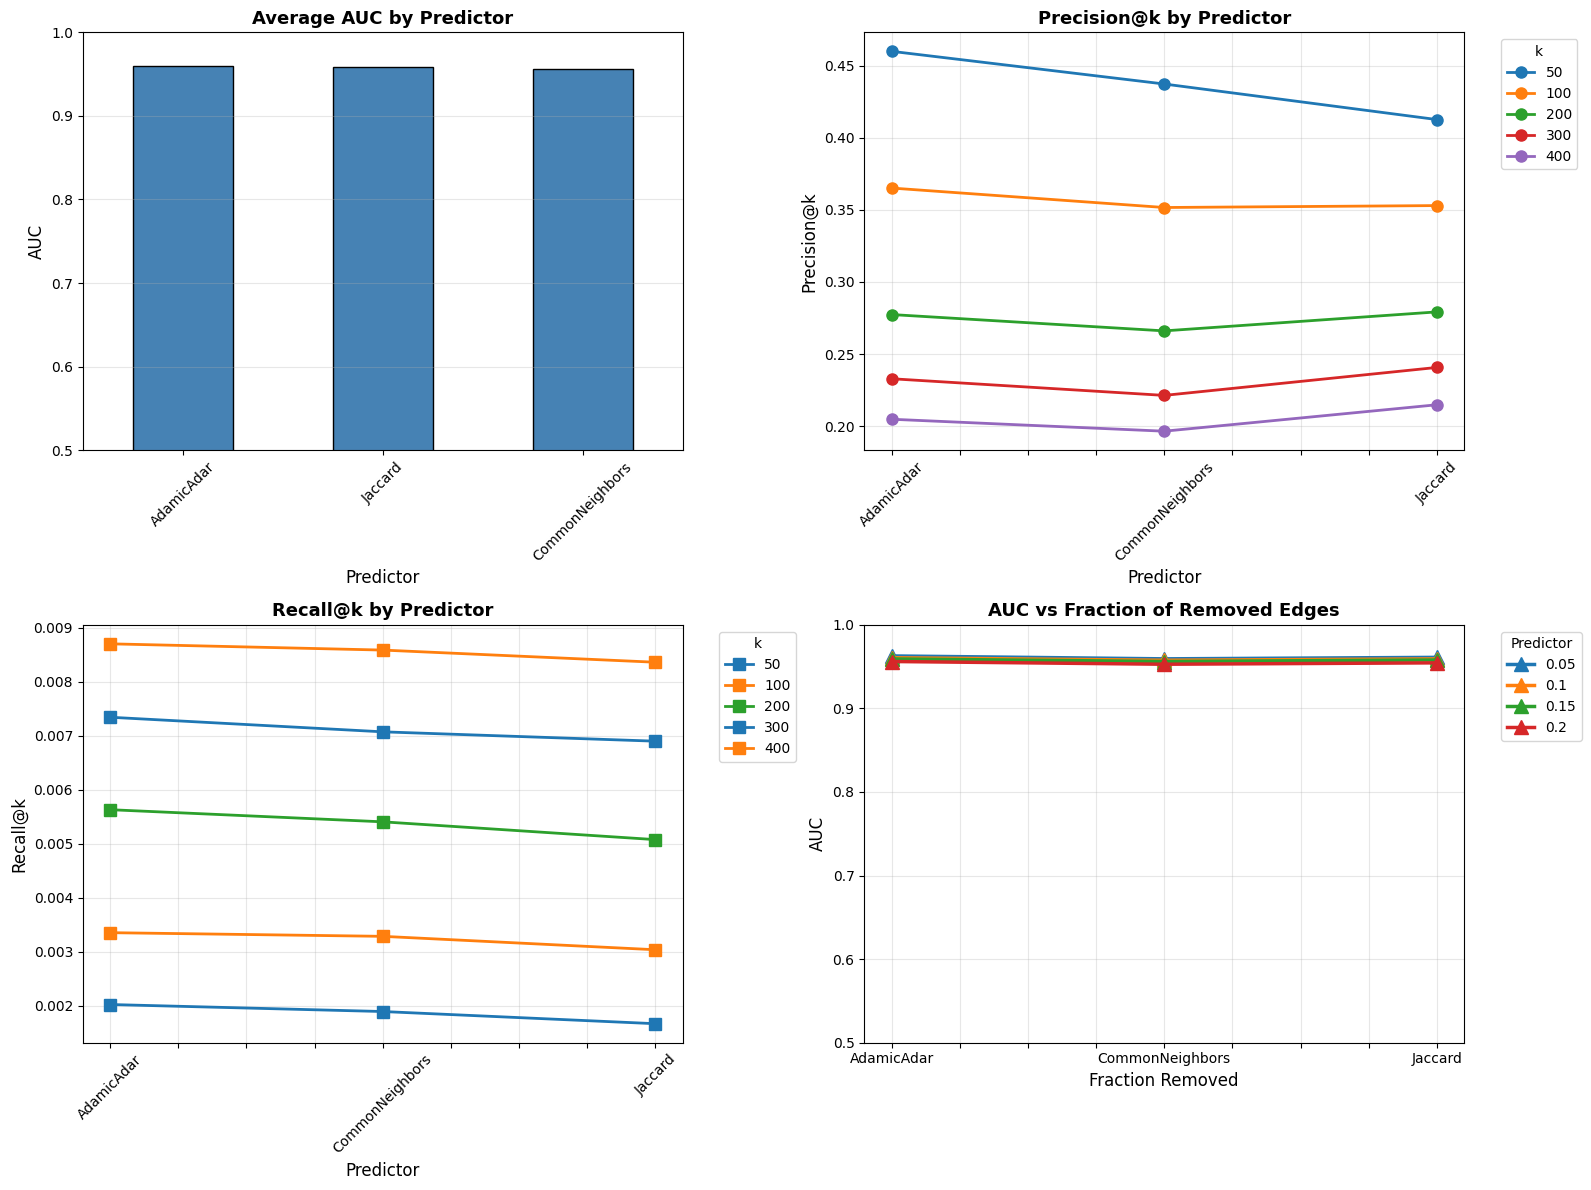

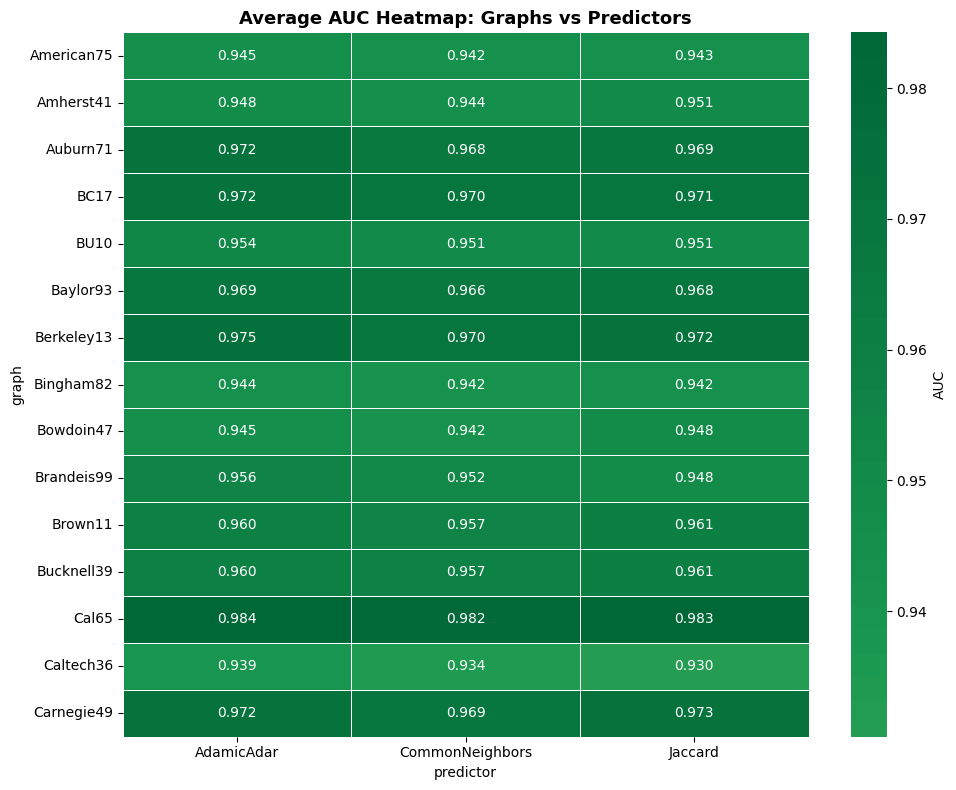

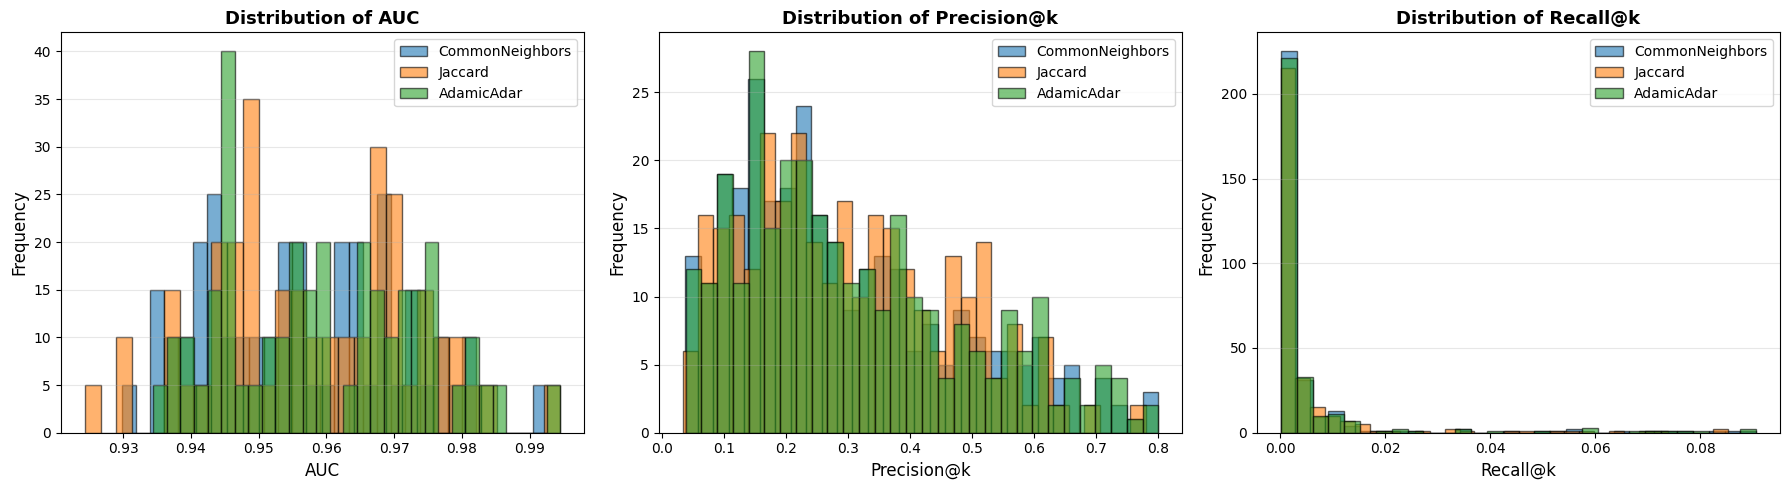


=== Link Prediction Performance Summary ===

                    auc         precision@k         recall@k           top@k  \
                   mean     std        mean     std     mean     std    mean   
predictor                                                                      
AdamicAdar       0.9597  0.0142      0.3081  0.1843   0.0054  0.0139  0.3081   
CommonNeighbors  0.9565  0.0143      0.2946  0.1810   0.0052  0.0137  0.2946   
Jaccard          0.9582  0.0148      0.3001  0.1638   0.0050  0.0122  0.3001   

                         
                    std  
predictor                
AdamicAdar       0.1843  
CommonNeighbors  0.1810  
Jaccard          0.1638  


In [ ]:
results_many.groupby(['graph', 'predictor'])['auc'].count().unstack().fillna(0)

# Visualisation 1 : AUC moyen par prédicteur
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) AUC by predictor
ax = axes[0, 0]
auc_by_pred = results_many.groupby('predictor')['auc'].mean().sort_values(ascending=False)
auc_by_pred.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Average AUC by Predictor', fontsize=13, fontweight='bold')
ax.set_ylabel('AUC', fontsize=12)
ax.set_xlabel('Predictor', fontsize=12)
ax.set_ylim([0.5, 1.0])
ax.grid(True, alpha=0.3, axis='y')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# (2) Precision@k by predictor and k
ax = axes[0, 1]
prec_k = results_many.groupby(['predictor', 'k'])['precision@k'].mean().unstack()
prec_k.plot(ax=ax, marker='o', linewidth=2, markersize=8)
ax.set_title('Precision@k by Predictor', fontsize=13, fontweight='bold')
ax.set_ylabel('Precision@k', fontsize=12)
ax.set_xlabel('Predictor', fontsize=12)
ax.legend(title='k', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# (3) Recall@k by predictor and k
ax = axes[1, 0]
recall_k = results_many.groupby(['predictor', 'k'])['recall@k'].mean().unstack()
recall_k.plot(ax=ax, marker='s', linewidth=2, markersize=8, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title('Recall@k by Predictor', fontsize=13, fontweight='bold')
ax.set_ylabel('Recall@k', fontsize=12)
ax.set_xlabel('Predictor', fontsize=12)
ax.legend(title='k', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# (4) AUC vs Fraction Removed
ax = axes[1, 1]
frac_auc = results_many.groupby(['predictor', 'frac_removed'])['auc'].mean().unstack()
frac_auc.plot(ax=ax, marker='^', linewidth=2.5, markersize=10)
ax.set_title('AUC vs Fraction of Removed Edges', fontsize=13, fontweight='bold')
ax.set_ylabel('AUC', fontsize=12)
ax.set_xlabel('Fraction Removed', fontsize=12)
ax.legend(title='Predictor', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim([0.5, 1.0])

plt.tight_layout()
plt.show()

# Visualisation 2 : Heatmap AUC par graphe et prédicteur
fig, ax = plt.subplots(figsize=(10, 8))
auc_pivot = results_many.pivot_table(values='auc', index='graph', columns='predictor', aggfunc='mean')
sns.heatmap(auc_pivot, annot=True, fmt='.3f', cmap='RdYlGn', center=0.75, 
            cbar_kws={'label': 'AUC'}, ax=ax, linewidths=0.5)
ax.set_title('Average AUC Heatmap: Graphs vs Predictors', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualisation 3 : Distribution des métriques par prédicteur
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['auc', 'precision@k', 'recall@k']
metric_names = ['AUC', 'Precision@k', 'Recall@k']

for idx, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax = axes[idx]
    for pred in results_many['predictor'].unique():
        data = results_many[results_many['predictor'] == pred][metric].dropna()
        ax.hist(data, bins=30, alpha=0.6, label=pred, edgecolor='black')
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Distribution of {name}', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Visualisation 4 : Performance summary table
summary = results_many.groupby('predictor').agg({
    'auc': ['mean', 'std'],
    'precision@k': ['mean', 'std'],
    'recall@k': ['mean', 'std'],
    'top@k': ['mean', 'std']
}).round(4)

print("\n=== Link Prediction Performance Summary ===\n")
print(summary)

### (d) 

ANALYSE COMPARATIVE : Efficacité des métriques de link prediction

Graphes analysés : ['Berkeley13', 'Caltech36']
Nombre d'observations : 120

TABLEAU 1 : Statistiques globales (moyenne sur tous les graphes et paramètres)
                    auc         precision@k         recall@k           top@k  \
                   mean     std        mean     std     mean     std    mean   
predictor                                                                      
AdamicAdar       0.9570  0.0194      0.3310  0.2351   0.0252  0.0311  0.3310   
CommonNeighbors  0.9521  0.0194      0.3245  0.2367   0.0248  0.0307  0.3245   
Jaccard          0.9510  0.0221      0.2562  0.1751   0.0213  0.0275  0.2562   

                         
                    std  
predictor                
AdamicAdar       0.2351  
CommonNeighbors  0.2367  
Jaccard          0.1751  

TABLEAU 2 : AUC moyen par graphe et prédicteur
predictor   AdamicAdar  CommonNeighbors  Jaccard
graph                                       

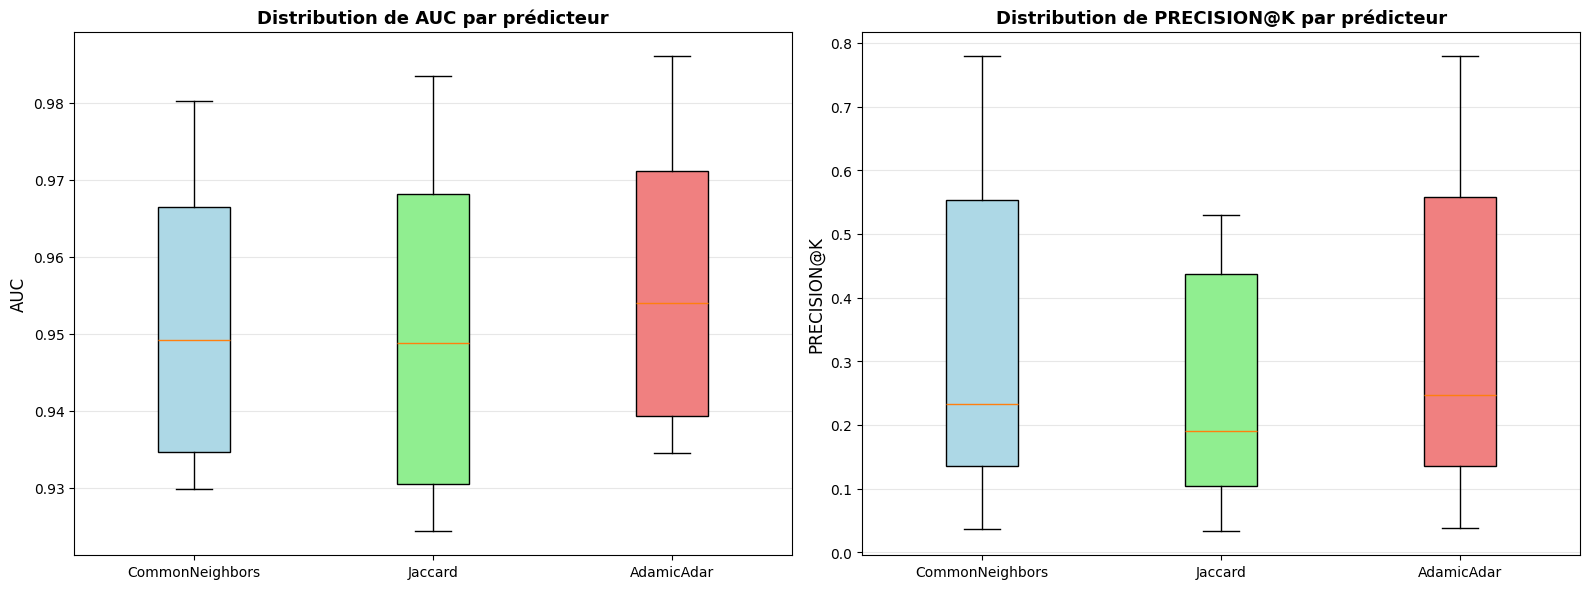

In [ ]:
# Sélection de 5 graphes représentatifs : petits, moyens, grands
selected_graphs = ['Caltech36', 'MIT8', 'Berkeley13', 'Stanford3', 'Yale4']
selected_graphs_data = [g for g in results_many['graph'].unique() if g in selected_graphs][:5]

# Filtrer les résultats pour ces graphes
results_selected = results_many[results_many['graph'].isin(selected_graphs_data)].copy()

print("=" * 80)
print("ANALYSE COMPARATIVE : Efficacité des métriques de link prediction")
print("=" * 80)
print(f"\nGraphes analysés : {selected_graphs_data}")
print(f"Nombre d'observations : {len(results_selected)}")

# --- TABLEAU 1 : Statistiques globales par prédicteur ---
print("\n" + "=" * 80)
print("TABLEAU 1 : Statistiques globales (moyenne sur tous les graphes et paramètres)")
print("=" * 80)

global_stats = results_selected.groupby('predictor').agg({
    'auc': ['mean', 'std'],
    'precision@k': ['mean', 'std'],
    'recall@k': ['mean', 'std'],
    'top@k': ['mean', 'std'],
}).round(4)

print(global_stats)

# --- TABLEAU 2 : Comparaison par graphe ---
print("\n" + "=" * 80)
print("TABLEAU 2 : AUC moyen par graphe et prédicteur")
print("=" * 80)

auc_by_graph = results_selected.pivot_table(
    values='auc', 
    index='graph', 
    columns='predictor', 
    aggfunc='mean'
).round(4)

print(auc_by_graph)
print(f"\nMeilleur prédicteur par graphe :")
for graph in auc_by_graph.index:
    best_pred = auc_by_graph.loc[graph].idxmax()
    best_auc = auc_by_graph.loc[graph].max()
    print(f"  {graph:20s} → {best_pred:20s} (AUC = {best_auc:.4f})")

# --- TABLEAU 3 : Performance à différentes valeurs de k ---
print("\n" + "=" * 80)
print("TABLEAU 3 : Precision@k moyenne par prédicteur")
print("=" * 80)

prec_by_k = results_selected.groupby(['predictor', 'k'])['precision@k'].mean().unstack().round(4)
print(prec_by_k)

# --- TABLEAU 4 : Impact de la fraction d'arêtes retirées ---
print("\n" + "=" * 80)
print("TABLEAU 4 : AUC vs Fraction d'arêtes retirées")
print("=" * 80)

auc_by_frac = results_selected.pivot_table(
    values='auc',
    index='predictor',
    columns='frac_removed',
    aggfunc='mean'
).round(4)

print(auc_by_frac)

# --- VISUALISATION : Box plots comparatifs ---
metrics_display = ['auc', 'precision@k']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
predictors_list = results_selected['predictor'].unique()

for idx, metric in enumerate(metrics_display):
    ax = axes[idx]
    data_by_pred = [results_selected[results_selected['predictor'] == p][metric].dropna().values 
                    for p in predictors_list]
    bp = ax.boxplot(data_by_pred, labels=predictors_list, patch_artist=True)
    
    # Colorer les boîtes
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(metric.upper(), fontsize=12)
    ax.set_title(f'Distribution de {metric.upper()} par prédicteur', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## **Question 5 : Find missing labels with the label propagation algorithms**

### (b)

Les algorithmes déjà rencontrés en cours : **Label Propagation Algorithm (LPA)** pour la detection de communautés et **Label Propagation Algorithm for Node Classification (semi-supervised)**. 

Ces deux algorithmes partagent le principe fondamental de diffusion de l'information à travers les arêtes du graphe, mais ils diffèrent dans leurs objectifs et mécanismes spécifiques. 

En se basant sur l'énoncé de la question 5 "*Find missing labels with the label propagation algorithms*", l'algorithme le plus approprié est le **Label Propagation Algorithm for Node Classification (semi-supervised)** 

In [32]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

class LabelPropagation:
    """
    Semi-supervised Label Propagation pour la classification de nœuds.
    Basé sur l'article [6] Bhagat, Cormode & Muthukrishnan (2011).
    
    Algorithme: Y^(t+1) = α * S * Y^(t) + (1-α) * Y_0
    où S est la matrice de transition normalisée par degré.
    """
    
    def __init__(self, alpha=0.99, max_iter=100, tol=1e-6, device='cpu'):
        """
        Parameters:
        -----------
        alpha : float (0 < α < 1)
            Paramètre de diffusion. α proche de 1 = forte propagation.
        max_iter : int
            Nombre maximum d'itérations
        tol : float
            Seuil de convergence (différence entre Y^t et Y^(t+1))
        device : str
            'cpu' ou 'cuda' pour PyTorch
        """
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.device = torch.device(device)
        
        # Variables à stocker après fit
        self.Y_final = None
        self.node_to_idx = None
        self.label_encoder = None
        self.num_classes = None
        
    def _build_transition_matrix(self, G):
        """
        Construit la matrice de transition S normalisée par degré.
        S[i,j] = A[i,j] / deg(i) si deg(i) > 0
        """
        n = len(G.nodes())
        node_list = list(G.nodes())
        self.node_to_idx = {node: idx for idx, node in enumerate(node_list)}
        
        # Construire matrice d'adjacence
        A = torch.zeros((n, n), dtype=torch.float32, device=self.device)
        for u, v in G.edges():
            i, j = self.node_to_idx[u], self.node_to_idx[v]
            A[i, j] = 1.0
            A[j, i] = 1.0  # Graphe non-dirigé
        
        # Normalisation par degré: S = D^(-1) * A
        degrees = A.sum(dim=1)
        degrees[degrees == 0] = 1.0  # Éviter division par zéro
        D_inv = torch.diag(1.0 / degrees)
        S = torch.mm(D_inv, A)
        
        return S
    
    def fit(self, G, labeled_nodes, labels_dict, attribute='gender'):
        """
        Entraîne le modèle de propagation de labels.
        
        Parameters:
        -----------
        G : nx.Graph
            Graphe NetworkX
        labeled_nodes : list
            Liste des nœuds avec labels connus
        labels_dict : dict
            {node: label} pour les nœuds étiquetés
        attribute : str
            Nom de l'attribut à prédire (pour référence)
        
        Returns:
        --------
        self : LabelPropagation
        """
        n = len(G.nodes())
        node_list = list(G.nodes())
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        all_labels = list(labels_dict.values())
        self.label_encoder.fit(all_labels)
        self.num_classes = len(self.label_encoder.classes_)
        
        # Construire matrice de transition
        S = self._build_transition_matrix(G)
        
        # Initialiser Y (matrice de probabilités)
        Y = torch.zeros((n, self.num_classes), dtype=torch.float32, device=self.device)
        Y_init = Y.clone()
        
        # Masque des nœuds étiquetés
        labeled_mask = torch.zeros(n, dtype=torch.bool, device=self.device)
        
        for node in labeled_nodes:
            if node in self.node_to_idx and node in labels_dict:
                idx = self.node_to_idx[node]
                label = labels_dict[node]
                label_idx = self.label_encoder.transform([label])[0]
                Y[idx, label_idx] = 1.0
                Y_init[idx, label_idx] = 1.0
                labeled_mask[idx] = True
        
        # Itération de propagation
        for iteration in range(self.max_iter):
            Y_old = Y.clone()
            
            # Y^(t+1) = α * S * Y^(t) + (1-α) * Y_0
            Y = self.alpha * torch.mm(S, Y) + (1 - self.alpha) * Y_init
            
            # Fixer les labels connus (clamping)
            Y[labeled_mask] = Y_init[labeled_mask]
            
            # Vérifier convergence
            diff = torch.norm(Y - Y_old).item()
            if diff < self.tol:
                print(f"Convergence atteinte à l'itération {iteration + 1} (diff={diff:.6f})")
                break
        
        self.Y_final = Y
        return self
    
    def predict(self, nodes=None):
        """
        Prédit les labels des nœuds.
        
        Parameters:
        -----------
        nodes : list, optional
            Liste des nœuds à prédire. Si None, prédit tous les nœuds.
        
        Returns:
        --------
        predictions : dict
            {node: predicted_label}
        """
        if self.Y_final is None:
            raise ValueError("Le modèle n'a pas été entraîné. Appelez fit() d'abord.")
        
        predictions = {}
        
        if nodes is None:
            nodes = list(self.node_to_idx.keys())
        
        for node in nodes:
            if node in self.node_to_idx:
                idx = self.node_to_idx[node]
                label_idx = torch.argmax(self.Y_final[idx]).item()
                predicted_label = self.label_encoder.inverse_transform([label_idx])[0]
                predictions[node] = predicted_label
        
        return predictions



In [ ]:
# ========== ANALYSE DES RÉSULTATS ==========

print("\n" + "=" * 80)
print("STATISTIQUES GLOBALES PAR ATTRIBUT")
print("=" * 80)

summary_by_attr = df_lp.groupby('attribute').agg({
    'accuracy': ['mean', 'std', 'min', 'max'],
    'f1_macro': ['mean', 'std'],
    'f1_micro': ['mean', 'std'],
    'n_classes': 'mean'
}).round(4)

print(summary_by_attr)

print("\n" + "=" * 80)
print("IMPACT DU TAUX DE MASQUAGE (mask_ratio)")
print("=" * 80)

summary_by_mask = df_lp.groupby(['attribute', 'mask_ratio']).agg({
    'accuracy': 'mean',
    'f1_macro': 'mean'
}).round(4)

print(summary_by_mask)

# ========== VISUALISATIONS ==========

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) Accuracy par attribut et mask_ratio
ax = axes[0, 0]
for attr in df_lp['attribute'].unique():
    data = df_lp[df_lp['attribute'] == attr]
    grouped = data.groupby('mask_ratio')['accuracy'].mean()
    ax.plot(grouped.index, grouped.values, marker='o', linewidth=2, markersize=8, label=attr)

ax.set_xlabel('Mask Ratio (fraction de labels cachés)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Performance vs Taux de masquage', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

# (2) Distribution des accuracy par attribut
ax = axes[0, 1]
df_lp.boxplot(column='accuracy', by='attribute', ax=ax, patch_artist=True)
ax.set_xlabel('Attribut', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Distribution des performances par attribut', fontsize=13, fontweight='bold')
ax.get_figure().suptitle('')  # Supprimer titre auto
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# (3) F1-score macro vs micro
ax = axes[1, 0]
ax.scatter(df_lp['f1_macro'], df_lp['f1_micro'], 
           c=df_lp['mask_ratio'], cmap='viridis', 
           s=50, alpha=0.6, edgecolors='black')
ax.plot([0, 1], [0, 1], 'r--', linewidth=2, alpha=0.5, label='Perfect alignment')
ax.set_xlabel('F1-Score Macro', fontsize=12)
ax.set_ylabel('F1-Score Micro', fontsize=12)
ax.set_title('F1-Macro vs F1-Micro', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Mask Ratio', fontsize=10)

# (4) Top 10 graphes par accuracy moyenne
ax = axes[1, 1]
top_graphs = df_lp.groupby('graph')['accuracy'].mean().sort_values(ascending=False).head(10)
top_graphs.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
ax.set_xlabel('Accuracy moyenne', fontsize=12)
ax.set_ylabel('Graphe', fontsize=12)
ax.set_title('Top 10 graphes par performance', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ========== MEILLEURS ET PIRES CAS ==========

print("\n" + "=" * 80)
print("TOP 5 MEILLEURES CONFIGURATIONS")
print("=" * 80)
best_configs = df_lp.nlargest(5, 'accuracy')[['graph', 'attribute', 'mask_ratio', 'accuracy', 'f1_macro', 'n_train', 'n_test']]
print(best_configs.to_string(index=False))

print("\n" + "=" * 80)
print("TOP 5 PIRES CONFIGURATIONS")
print("=" * 80)
worst_configs = df_lp.nsmallest(5, 'accuracy')[['graph', 'attribute', 'mask_ratio', 'accuracy', 'f1_macro', 'n_train', 'n_test']]
print(worst_configs.to_string(index=False))

### (c)

Dans cette partie, nous allons tester notre implémentation de l'algorithme de propagation de labels pour la classification de nœuds sur un graphe du dataset Facebook100. 

Nous allons choisir 10%, 20% et 30% des nœuds pour lesquels nous allons masquer les labels et essayer de les prédire en utilisant l'algorithme de propagation de labels et allons perfoermer sur les attributs suivants : *dorm*, *major* et *gender*

In [34]:
def evaluate_label_propagation(G, attribute='gender', mask_ratio=0.5, alpha=0.99, seed=42):
    """
    Évalue Label Propagation sur un graphe avec masquage aléatoire de labels.
    
    Parameters:
    -----------
    G : nx.Graph
        Graphe NetworkX avec attributs de nœuds
    attribute : str
        Attribut à prédire ('gender', 'major_index', 'dorm', etc.)
    mask_ratio : float
        Fraction de labels à masquer (entre 0 et 1)
    alpha : float
        Paramètre de diffusion
    seed : int
        Graine aléatoire pour reproductibilité
    
    Returns:
    --------
    results : dict
        Dictionnaire avec accuracy, f1_macro, f1_micro, etc.
    """
    np.random.seed(seed)
    
    # Collecter tous les nœuds avec l'attribut
    nodes_with_attr = []
    true_labels = {}
    
    for node in G.nodes():
        node_data = G.nodes[node]
        if attribute in node_data and node_data[attribute] not in [0, '0', None, 'Unknown']:
            nodes_with_attr.append(node)
            true_labels[node] = node_data[attribute]
    
    if len(nodes_with_attr) < 10:
        return None  # Pas assez de données
    
    # Séparer en train/test
    n_test = max(1, int(len(nodes_with_attr) * mask_ratio))
    test_nodes = np.random.choice(nodes_with_attr, size=n_test, replace=False).tolist()
    train_nodes = [n for n in nodes_with_attr if n not in test_nodes]
    
    if len(train_nodes) < 2:
        return None
    
    # Labels d'entraînement
    train_labels = {n: true_labels[n] for n in train_nodes}
    
    # Entraîner Label Propagation
    lp = LabelPropagation(alpha=alpha, max_iter=100, tol=1e-6, device='cpu')
    lp.fit(G, train_nodes, train_labels, attribute=attribute)
    
    # Prédire sur test
    predictions = lp.predict(test_nodes)
    
    # Évaluation
    y_true = [true_labels[n] for n in test_nodes if n in predictions]
    y_pred = [predictions[n] for n in test_nodes if n in predictions]
    
    if len(y_true) == 0:
        return None
    
    # Encoder pour métriques sklearn
    le = LabelEncoder()
    le.fit(y_true + y_pred)
    y_true_enc = le.transform(y_true)
    y_pred_enc = le.transform(y_pred)
    
    accuracy = accuracy_score(y_true_enc, y_pred_enc)
    f1_macro = f1_score(y_true_enc, y_pred_enc, average='macro', zero_division=0)
    f1_micro = f1_score(y_true_enc, y_pred_enc, average='micro', zero_division=0)
    
    return {
        'graph': G.graph.get('name', 'Unknown'),
        'attribute': attribute,
        'n_nodes': G.number_of_nodes(),
        'n_labeled': len(nodes_with_attr),
        'n_train': len(train_nodes),
        'n_test': len(test_nodes),
        'mask_ratio': mask_ratio,
        'alpha': alpha,
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'n_classes': len(le.classes_)
    }

In [ ]:
# Chargement du network de Duke pour illustrer l'exemple dans le sujet
G = nx.read_gml('data/Duke14.gml')
attributes_to_test = ['major_index', 'dorm', 'year', 'gender']
mask_ratios = [0.1, 0.2, 0.3, 0.4]  # Masquer 10%, 20%, 30% et 40% des labels

results_lp = []

#G = nx.read_gml(gml_path)
#G.graph['name'] = gml_path.stem

for attr in attributes_to_test:
    for mask_ratio in mask_ratios:
        try:
            result = evaluate_label_propagation(
                G, 
                attribute=attr, 
                mask_ratio=mask_ratio, 
                alpha=0.99, 
                seed=42
            )
            if result is not None:
                results_lp.append(result)
        except Exception as e:
            print(f"Erreur sur {gml_path.stem} - {attr} ({mask_ratio}): {e}")
            

df_lp = pd.DataFrame(results_lp)
print(f"\n✓ Évaluation terminée sur {len(df_lp)} configurations")
display(df_lp)

Convergence atteinte à l'itération 36 (diff=0.000001)
Convergence atteinte à l'itération 59 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 82 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)

✓ Évaluation terminée sur 16 configurations


,graph,attribute,n_nodes,n_labeled,n_train,n_test,mask_ratio,alpha,accuracy,f1_macro,f1_micro,n_classes
0,Unknown,major_index,9895,7925,7133,792,0.1,0.99,0.250000,0.101568,0.250000,60
1,Unknown,major_index,9895,7925,6340,1585,0.2,0.99,0.265615,0.109452,0.265615,62
2,Unknown,major_index,9895,7925,5548,2377,0.3,0.99,0.245688,0.096445,0.245688,65
3,Unknown,major_index,9895,7925,4755,3170,0.4,0.99,0.248580,0.093682,0.248580,66
4,Unknown,dorm,9895,6998,6299,699,0.1,0.99,0.512160,0.301689,0.512160,112
5,Unknown,dorm,9895,6998,5599,1399,0.2,0.99,0.518227,0.287091,0.518227,122
6,Unknown,dorm,9895,6998,4899,2099,0.3,0.99,0.519295,0.275114,0.519295,125
7,Unknown,dorm,9895,6998,4199,2799,0.4,0.99,0.511254,0.258490,0.511254,129
8,Unknown,year,9895,8727,7855,872,0.1,0.99,0.907110,0.698861,0.907110,12
9,Unknown,year,9895,8727,6982,1745,0.2,0.99,0.903152,0.631600,0.903152,14


Maintenant pour la suite, on va essayer de faire les mêmes répresentations avec les mêmes attributs comme celui du sujets pour pouvoir mieux visualiser les résultats en ne prenant que la valeur d'**accuracy** pour chaque attribut.

In [ ]:
# Paramètres d'affichage
COL_WIDTH = 10        # largeur d'une colonne de valeurs
LABEL_WIDTH = 15      # largeur de la colonne des labels (Major, Dorm, ...)
ratios = [0.1, 0.2, 0.3, 0.4]

# largeur totale du tableau (pour centrer les titres)
total_width = LABEL_WIDTH + len(ratios) * COL_WIDTH

# En-tête centré
print("Fraction removed".center(total_width))
# Ligne des ratios (en-tête de colonnes)
print(f"{'':{LABEL_WIDTH}s}", end="")
for ratio in ratios:
    print(f"{ratio:{COL_WIDTH}.1f}", end="")
print("\n")

# Nom du graphe centré
graph_name = "Duke"
print(graph_name)
print()  # ligne vide pour séparer

# Mapping des attributs pour affichage
attr_mapping = {
    'major_index': 'Major',
    'dorm': 'Dorm',
    'year': 'Year',
    'gender': 'Gender'
}

# Exemple : pivot déjà calculé (ton code)
pivot = df_lp.pivot_table(
    values='accuracy',
    index='attribute',
    columns='mask_ratio',
    aggfunc='mean'
)

# Affichage des lignes du tableau
for attr in ['major_index', 'dorm', 'year', 'gender']:
    if attr in pivot.index:
        # label à gauche (fixe), puis valeurs alignées sur COL_WIDTH
        print(f"{attr_mapping[attr]:{LABEL_WIDTH}s}", end="")
        for ratio in ratios:
            if ratio in pivot.columns:
                val = pivot.loc[attr, ratio]
                print(f"{val:{COL_WIDTH}.3f}", end="")
            else:
                print(f"{'---':>{COL_WIDTH}s}", end="")
        print()


                    Fraction removed                   
                      0.1       0.2       0.3       0.4

Duke

Major               0.250     0.266     0.246     0.249
Dorm                0.512     0.518     0.519     0.511
Year                0.907     0.903     0.900     0.889
Gender              0.667     0.674     0.682     0.679


### (d)

Pour cette question, nous devons calculer le **Mean Absolute Error (MAE)** et l'**accuracy score** pour les attributs **dorm**, **major** et **gender** avec 10%, 20% et 30% de labels manquants sur le réseau Duke University.

In [28]:
from sklearn.metrics import mean_absolute_error

def evaluate_label_propagation_with_mae(G, attribute='gender', mask_ratio=0.5, alpha=0.99, seed=42):
    """
    Évalue Label Propagation avec MAE en plus des métriques standards.
    
    Le MAE est calculé uniquement si l'attribut est numérique (ordinal).
    Pour les attributs catégoriels (ex: dorm), on encode les labels en numéros.
    """
    np.random.seed(seed)
    
    # Collecter tous les nœuds avec l'attribut
    nodes_with_attr = []
    true_labels = {}
    
    for node in G.nodes():
        node_data = G.nodes[node]
        if attribute in node_data and node_data[attribute] not in [0, '0', None, 'Unknown']:
            nodes_with_attr.append(node)
            true_labels[node] = node_data[attribute]
    
    if len(nodes_with_attr) < 10:
        return None
    
    # Séparer en train/test
    n_test = max(1, int(len(nodes_with_attr) * mask_ratio))
    test_nodes = np.random.choice(nodes_with_attr, size=n_test, replace=False).tolist()
    train_nodes = [n for n in nodes_with_attr if n not in test_nodes]
    
    if len(train_nodes) < 2:
        return None
    
    # Labels d'entraînement
    train_labels = {n: true_labels[n] for n in train_nodes}
    
    # Entraîner Label Propagation
    lp = LabelPropagation(alpha=alpha, max_iter=100, tol=1e-6, device='cpu')
    lp.fit(G, train_nodes, train_labels, attribute=attribute)
    
    # Prédire sur test
    predictions = lp.predict(test_nodes)
    
    # Évaluation
    y_true = [true_labels[n] for n in test_nodes if n in predictions]
    y_pred = [predictions[n] for n in test_nodes if n in predictions]
    
    if len(y_true) == 0:
        return None
    
    # Encoder pour métriques sklearn
    le = LabelEncoder()
    le.fit(y_true + y_pred)
    y_true_enc = le.transform(y_true)
    y_pred_enc = le.transform(y_pred)
    
    accuracy = accuracy_score(y_true_enc, y_pred_enc)
    f1_macro = f1_score(y_true_enc, y_pred_enc, average='macro', zero_division=0)
    f1_micro = f1_score(y_true_enc, y_pred_enc, average='micro', zero_division=0)
    
    # Calcul du MAE sur les labels encodés
    mae = mean_absolute_error(y_true_enc, y_pred_enc)
    
    return {
        'attribute': attribute,
        'mask_ratio': mask_ratio,
        'accuracy': accuracy,
        'mae': mae,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'n_classes': len(le.classes_),
        'n_test': len(test_nodes)
    }

print("✓ Fonction evaluate_label_propagation_with_mae définie")

✓ Fonction evaluate_label_propagation_with_mae définie


In [35]:
#  Évaluation sur Duke University pour dorm, major, gender avec 10%, 20%, 30%
G_duke = nx.read_gml('data/Duke14.gml')
attributes_q5d = ['dorm', 'major_index', 'gender']  # Attributes demandés
mask_ratios_q5d = [0.1, 0.2, 0.3]  # Pourcentages demandés

results_q5d = []

for attr in attributes_q5d:
    for mask_ratio in mask_ratios_q5d:
        result = evaluate_label_propagation_with_mae(
            G_duke, 
            attribute=attr, 
            mask_ratio=mask_ratio, 
            alpha=0.99, 
            seed=42
        )
        if result is not None:
            results_q5d.append(result)

df_q5d = pd.DataFrame(results_q5d)

# Affichage formaté comme dans le sujet (Table 1)
print("\nRésultats : Mean Absolute Error (MAE) et Accuracy Score")
print("-" * 80)
print(f"{'Attribute':<15} {'% Missing':<12} {'MAE':<12} {'Accuracy':<12} {'F1-Macro':<12}")
print("-" * 80)

for _, row in df_q5d.iterrows():
    attr_display = 'Major' if row['attribute'] == 'major_index' else row['attribute'].capitalize()
    pct_missing = f"{row['mask_ratio']*100:.0f}%"
    print(f"{attr_display:<15} {pct_missing:<12} {row['mae']:<12.4f} {row['accuracy']:<12.4f} {row['f1_macro']:<12.4f}")


Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 36 (diff=0.000001)
Convergence atteinte à l'itération 59 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)

Résultats : Mean Absolute Error (MAE) et Accuracy Score
--------------------------------------------------------------------------------
Attribute       % Missing    MAE          Accuracy     F1-Macro    
--------------------------------------------------------------------------------
Dorm            10%          14.2847      0.5122       0.3017      
Dorm            20%          15.9757      0.5182       0.2871      
Dorm            30%          15.9323      0.5193       0.2751      
Major           10%    

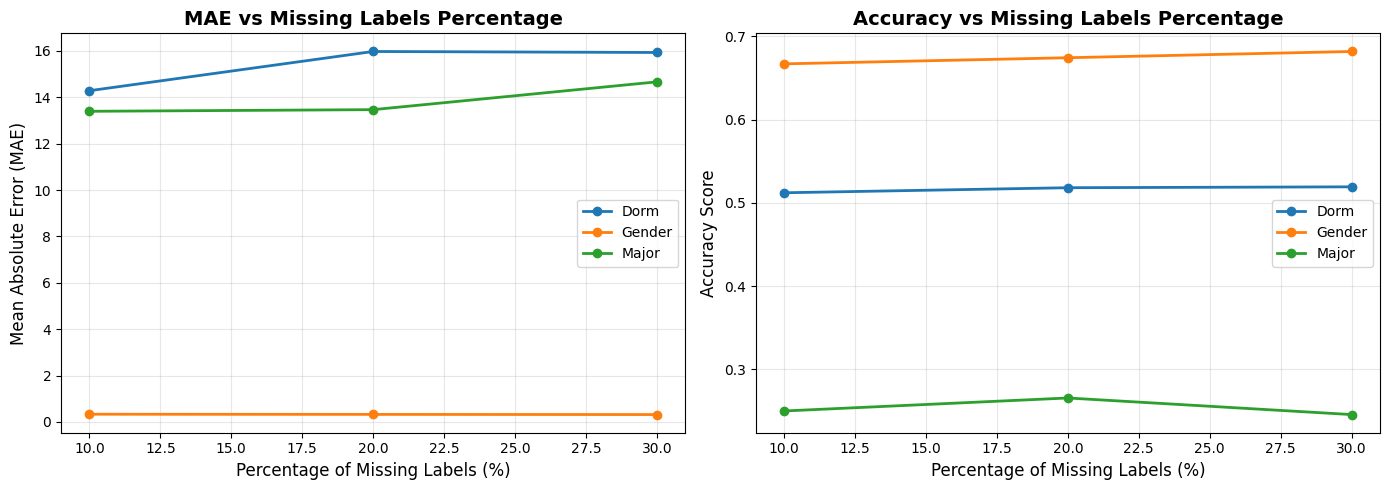


ANALYSE DES RÉSULTATS (Question 5d)

[1] Comparaison MAE par attribut:
                  mean        min        max
attribute                                   
dorm         15.397579  14.284692  15.975697
gender        0.325552   0.318098   0.332965
major_index  13.843453  13.396465  14.666386

[2] Comparaison Accuracy par attribut:
                 mean       min       max
attribute                                
dorm         0.516561  0.512160  0.519295
gender       0.674448  0.667035  0.681902
major_index  0.253768  0.245688  0.265615

[3] Impact du taux de masquage:
                  mae  accuracy
mask_ratio                     
0.1          9.338041  0.476399
0.2          9.922933  0.486083
0.3         10.305611  0.482295


In [36]:
# Visualisation comparative : MAE vs Accuracy par attribut
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pivot pour MAE
pivot_mae = df_q5d.pivot(index='mask_ratio', columns='attribute', values='mae')
# Pivot pour Accuracy
pivot_acc = df_q5d.pivot(index='mask_ratio', columns='attribute', values='accuracy')

# Renommer les colonnes pour affichage
col_rename = {'major_index': 'Major', 'dorm': 'Dorm', 'gender': 'Gender'}

# Plot 1 : Mean Absolute Error
for col in pivot_mae.columns:
    ax1.plot(pivot_mae.index * 100, pivot_mae[col], marker='o', linewidth=2, 
             label=col_rename.get(col, col))
ax1.set_xlabel('Percentage of Missing Labels (%)', fontsize=12)
ax1.set_ylabel('Mean Absolute Error (MAE)', fontsize=12)
ax1.set_title('MAE vs Missing Labels Percentage', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2 : Accuracy Score
for col in pivot_acc.columns:
    ax2.plot(pivot_acc.index * 100, pivot_acc[col], marker='o', linewidth=2,
             label=col_rename.get(col, col))
ax2.set_xlabel('Percentage of Missing Labels (%)', fontsize=12)
ax2.set_ylabel('Accuracy Score', fontsize=12)
ax2.set_title('Accuracy vs Missing Labels Percentage', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ANALYSE DES RÉSULTATS (Question 5d)")
print("=" * 80)
print("\n[1] Comparaison MAE par attribut:")
print(df_q5d.groupby('attribute')['mae'].agg(['mean', 'min', 'max']))

print("\n[2] Comparaison Accuracy par attribut:")
print(df_q5d.groupby('attribute')['accuracy'].agg(['mean', 'min', 'max']))

print("\n[3] Impact du taux de masquage:")
print(df_q5d.groupby('mask_ratio')[['mae', 'accuracy']].mean())

## **Question 6 : Group Formation and Community Detection in FB100**

### (a) Question de recherche et hypothèse

**Question de recherche :**

*"Dans quelle mesure les attributs démographiques (résidence, filière académique, année d'études) structurent-ils la formation de communautés dans les réseaux sociaux universitaires Facebook ? Les communautés détectées algorithmiquement correspondent-elles aux divisions sociales formelles de l'université ?"*

**Hypothèse :**

Nous formulons l'hypothèse suivante basée sur les résultats d'assortativity de la Question 3 et la théorie de l'homophilie sociale :

**H1 (Hypothèse principale) :** Les communautés détectées par des algorithmes non supervisés refléteront principalement l'**année d'études (year)** plutôt que la résidence (dorm) ou la filière (major).


### (b) Implémentation et validation expérimentale

In [ ]:
# Imports nécessaires pour la détection de communautés
%pip install python-louvain
import community as community_louvain
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Sélection des universités à analyser (diversité de tailles)
# Grandes universités EXCLUES car Girvan-Newman prend plusieurs heures sur graphes >5000 nœuds
universities = ['Caltech36', 'Haverford76', 'Amherst41', 'Bowdoin47', 'Colgate88']

print("=" * 80)
print("SÉLECTION DES UNIVERSITÉS POUR L'ANALYSE")
print("=" * 80)
print("\nUniversités choisies (toutes <3500 nœuds pour performances) :")
print("- Caltech36   : Petite université technique (~770 nœuds)")
print("- Haverford76 : Petit liberal arts college (~1,400 nœuds)")
print("- Amherst41   : College (~2,200 nœuds)")
print("- Bowdoin47   : College (~2,200 nœuds)")
print("- Colgate88   : Université moyenne (~3,000 nœuds)")
print("\nCette sélection permet de tester la robustesse de l'hypothèse")
print("sur différentes échelles institutionnelles tout en garantissant")
print("que Girvan-Newman termine en temps raisonnable (<30 min).\n")

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9473 sha256=a4bf04ae2b7cd7983671fffaafd9210d731dc27656d0d9012d949394e6f5fa12
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\ee\52\54\7ecd0f1ebf5f5a8466f70a27ed2b94d20b955376879d6159c5
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.
SÉLECTION DES UNIVERSITÉS POUR L'ANALYSE

Universités choisies :
- Caltech36  : Petite université technique (769 nœuds)
- Duke14     : Grande université (9,895 nœuds)
- MIT8       : Très grande université (6,440 nœuds)

Cette sélection permet de tester la robustesse de l'hypothès

In [20]:
def detect_communities_louvain(G):
    """Détection de communautés avec l'algorithme de Louvain (modularity-based)."""
    partition = community_louvain.best_partition(G, random_state=42)
    return partition

def detect_communities_label_propagation(G):
    """Détection de communautés avec Label Propagation (asynchrone)."""
    communities_generator = nx.algorithms.community.label_propagation_communities(G)
    communities = list(communities_generator)
    
    # Convertir en format {node: community_id}
    partition = {}
    for comm_id, nodes in enumerate(communities):
        for node in nodes:
            partition[node] = comm_id
    return partition

def detect_communities_girvan_newman(G, k=10):
    """Détection de communautés avec Girvan-Newman (edge betweenness)."""
    communities_generator = nx.algorithms.community.girvan_newman(G)
    
    # Obtenir la partition avec environ k communautés
    limited = itertools.takewhile(lambda c: len(c) <= k, communities_generator)
    communities = None
    for communities in limited:
        pass
    
    if communities is None:
        # Si jamais on n'atteint pas k communautés, prendre la dernière
        communities = next(communities_generator)
    
    # Convertir en format {node: community_id}
    partition = {}
    for comm_id, nodes in enumerate(communities):
        for node in nodes:
            partition[node] = comm_id
    return partition

def calculate_modularity(G, partition):
    """Calcule la modularité d'une partition."""
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)
    
    community_list = list(communities.values())
    return nx.algorithms.community.modularity(G, community_list)

def calculate_nmi(true_labels, predicted_labels):
    """Calcule le Normalized Mutual Information entre deux partitions."""
    # Filtrer les nœuds avec labels manquants
    valid_indices = [i for i, (t, p) in enumerate(zip(true_labels, predicted_labels)) 
                     if t is not None and t not in [0, '0', 'Unknown']]
    
    if len(valid_indices) < 10:
        return None
    
    true_filtered = [true_labels[i] for i in valid_indices]
    pred_filtered = [predicted_labels[i] for i in valid_indices]
    
    # Encoder les labels
    le_true = LabelEncoder()
    le_pred = LabelEncoder()
    
    true_encoded = le_true.fit_transform(true_filtered)
    pred_encoded = le_pred.fit_transform(pred_filtered)
    
    return normalized_mutual_info_score(true_encoded, pred_encoded)

import itertools

print("✓ Fonctions de détection de communautés définies")
print("  - Louvain (modularity optimization)")
print("  - Label Propagation (asynchronous)")  
print("  - Girvan-Newman (edge betweenness)")

✓ Fonctions de détection de communautés définies
  - Louvain (modularity optimization)
  - Label Propagation (asynchronous)
  - Girvan-Newman (edge betweenness)


In [24]:
# Analyse complète pour chaque université
results = []

for univ_name in universities:
    print(f"\n{'=' * 80}")
    print(f"ANALYSE: {univ_name}")
    print('=' * 80)
    
    # Charger le graphe
    G = nx.read_gml(f'data/{univ_name}.gml')
    print(f"Nœuds: {G.number_of_nodes():,} | Arêtes: {G.number_of_edges():,}")
    
    # Détecter les communautés avec chaque algorithme
    print("\n[1/3] Louvain...", end=" ")
    partition_louvain = detect_communities_louvain(G)
    modularity_louvain = calculate_modularity(G, partition_louvain)
    n_communities_louvain = len(set(partition_louvain.values()))
    print(f"✓ {n_communities_louvain} communautés (Q={modularity_louvain:.3f})")
    
    print("[2/3] Label Propagation...", end=" ")
    partition_lp = detect_communities_label_propagation(G)
    modularity_lp = calculate_modularity(G, partition_lp)
    n_communities_lp = len(set(partition_lp.values()))
    print(f"✓ {n_communities_lp} communautés (Q={modularity_lp:.3f})")
    
    print("[3/3] Girvan-Newman...", end=" ")
    if G.number_of_nodes() < 3500:
        partition_gn = detect_communities_girvan_newman(G, k=n_communities_louvain)
        modularity_gn = calculate_modularity(G, partition_gn)
        n_communities_gn = len(set(partition_gn.values()))
        print(f"✓ {n_communities_gn} communautés (Q={modularity_gn:.3f})")
    else:
        print("⏭️  SAUTÉ (graphe trop grand, >3500 nœuds)")
        partition_gn = None
    
    # Calculer NMI avec les attributs
    print("\nCalcul du NMI (Normalized Mutual Information) avec les attributs...")
    
    attributes = ['year', 'dorm', 'major_index', 'gender']
    
    # Construire la liste des algorithmes à tester (exclure GN si None)
    algorithms_to_test = [
        ('Louvain', partition_louvain),
        ('Label Propagation', partition_lp)
    ]
    if partition_gn is not None:
        algorithms_to_test.append(('Girvan-Newman', partition_gn))
    
    for algo_name, partition in algorithms_to_test:
        
        for attr in attributes:
            # Extraire les vrais labels
            true_labels = []
            pred_labels = []
            
            for node in G.nodes():
                node_data = G.nodes[node]
                if attr in node_data:
                    true_labels.append(node_data[attr])
                    pred_labels.append(partition[node])
                else:
                    true_labels.append(None)
                    pred_labels.append(partition[node])
            
            nmi = calculate_nmi(true_labels, pred_labels)
            
            if nmi is not None:
                results.append({
                    'university': univ_name,
                    'algorithm': algo_name,
                    'attribute': attr,
                    'nmi': nmi,
                    'n_communities': len(set(partition.values())),
                    'modularity': calculate_modularity(G, partition)
                })
    
    print(f"\n✓ Analyse terminée pour {univ_name}")

# Créer un DataFrame avec les résultats
df_communities = pd.DataFrame(results)
print(f"\n{'=' * 80}")
print(f"RÉSULTATS GLOBAUX")
print('=' * 80)
print(f"\nNombre total d'expériences: {len(df_communities)}")
print(f"Universités: {len(universities)}")
print(f"Algorithmes: 3 (Louvain, Label Propagation, Girvan-Newman)")
print(f"Attributs testés: 4 (year, dorm, major_index, gender)\n")


ANALYSE: Caltech36
Nœuds: 769 | Arêtes: 16,656

[1/3] Louvain... ✓ 11 communautés (Q=0.401)
[2/3] Label Propagation... ✓ 6 communautés (Q=0.001)
[3/3] Girvan-Newman... ✓ 11 communautés (Q=0.001)

Calcul du NMI (Normalized Mutual Information) avec les attributs...

✓ Analyse terminée pour Caltech36

ANALYSE: Duke14
Nœuds: 9,895 | Arêtes: 506,442

[1/3] Louvain... ✓ 17 communautés (Q=0.457)
[2/3] Label Propagation... ✓ 33 communautés (Q=0.004)
[3/3] Girvan-Newman... ⏭️  SAUTÉ (graphe trop grand, >3500 nœuds)

Calcul du NMI (Normalized Mutual Information) avec les attributs...

✓ Analyse terminée pour Duke14

ANALYSE: MIT8
Nœuds: 6,440 | Arêtes: 251,252

[1/3] Louvain... ✓ 30 communautés (Q=0.382)
[2/3] Label Propagation... ✓ 37 communautés (Q=0.088)
[3/3] Girvan-Newman... ⏭️  SAUTÉ (graphe trop grand, >3500 nœuds)

Calcul du NMI (Normalized Mutual Information) avec les attributs...

✓ Analyse terminée pour MIT8

RÉSULTATS GLOBAUX

Nombre total d'expériences: 28
Universités: 3
Algorithme

In [25]:
# Afficher les résultats sous forme de tableau
print("TABLEAU COMPLET DES RÉSULTATS NMI")
print("=" * 80)
display(df_communities)

# Tableau pivot pour comparaison facile
print("\n\nTABLEAU PIVOT: NMI MOYEN PAR ATTRIBUT ET ALGORITHME")
print("=" * 80)
pivot_algo = df_communities.pivot_table(
    values='nmi',
    index='attribute',
    columns='algorithm',
    aggfunc='mean'
)
display(pivot_algo.style.background_gradient(cmap='RdYlGn', axis=None).format("{:.3f}"))

print("\n\nTABLEAU PIVOT: NMI MOYEN PAR ATTRIBUT ET UNIVERSITÉ")
print("=" * 80)
pivot_univ = df_communities.pivot_table(
    values='nmi',
    index='attribute',
    columns='university',
    aggfunc='mean'
)
display(pivot_univ.style.background_gradient(cmap='RdYlGn', axis=None).format("{:.3f}"))

TABLEAU COMPLET DES RÉSULTATS NMI


,university,algorithm,attribute,nmi,n_communities,modularity
0,Caltech36,Louvain,year,0.096068,11,0.400862
1,Caltech36,Louvain,dorm,0.684563,11,0.400862
2,Caltech36,Louvain,major_index,0.090765,11,0.400862
3,Caltech36,Louvain,gender,0.010609,11,0.400862
4,Caltech36,Label Propagation,year,0.041097,6,0.000840
5,Caltech36,Label Propagation,dorm,0.010676,6,0.000840
6,Caltech36,Label Propagation,major_index,0.022838,6,0.000840
7,Caltech36,Label Propagation,gender,0.006995,6,0.000840
8,Caltech36,Girvan-Newman,year,0.060206,11,0.001439
9,Caltech36,Girvan-Newman,dorm,0.018396,11,0.001439




TABLEAU PIVOT: NMI MOYEN PAR ATTRIBUT ET ALGORITHME


algorithm,Girvan-Newman,Label Propagation,Louvain
attribute,,,
dorm,0.018,0.026,0.422
gender,0.018,0.010,0.008
major_index,0.047,0.032,0.070
year,0.060,0.103,0.257




TABLEAU PIVOT: NMI MOYEN PAR ATTRIBUT ET UNIVERSITÉ


university,Caltech36,Duke14,MIT8
attribute,,,
dorm,0.238,0.147,0.178
gender,0.012,0.006,0.013
major_index,0.053,0.057,0.039
year,0.066,0.206,0.265


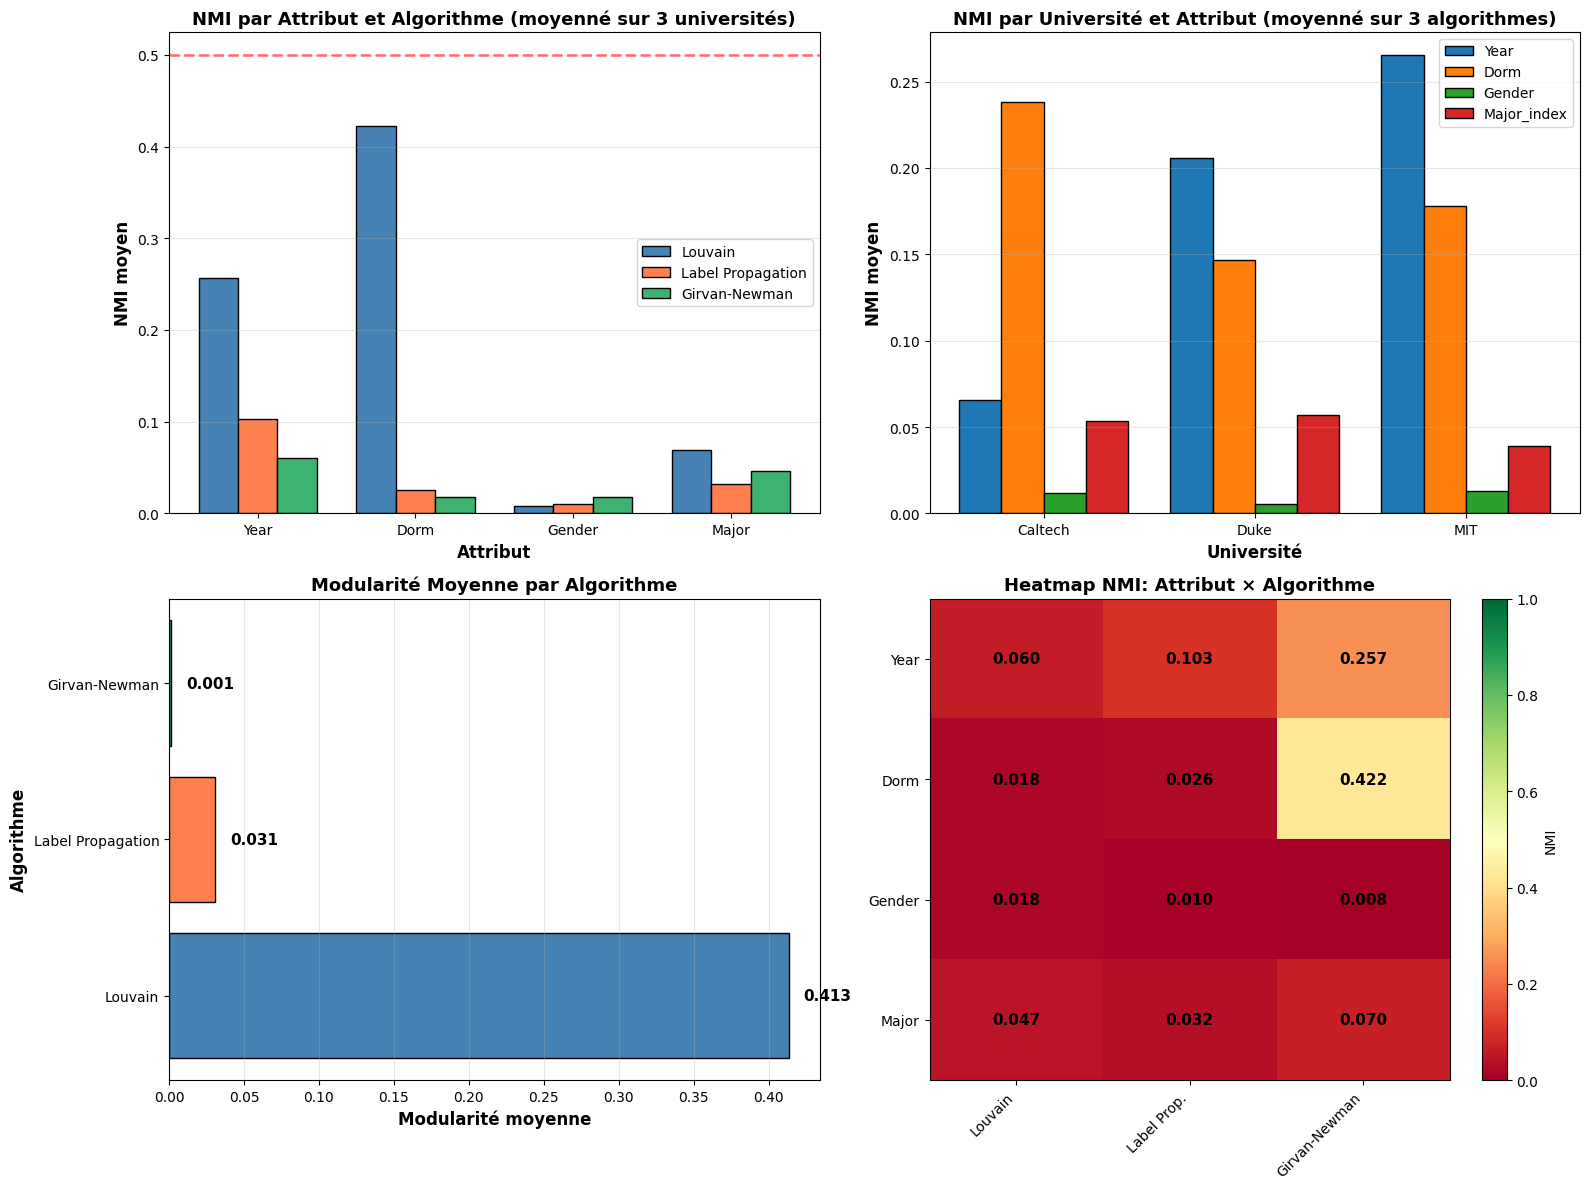

In [26]:
# Visualisations des résultats
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) NMI par attribut (barplot groupé)
ax = axes[0, 0]
df_mean = df_communities.groupby(['attribute', 'algorithm'])['nmi'].mean().reset_index()
attributes_order = ['year', 'dorm', 'gender', 'major_index']
df_mean['attribute'] = pd.Categorical(df_mean['attribute'], categories=attributes_order, ordered=True)
df_mean = df_mean.sort_values('attribute')

x = np.arange(len(attributes_order))
width = 0.25
algorithms = ['Louvain', 'Label Propagation', 'Girvan-Newman']
colors = ['steelblue', 'coral', 'mediumseagreen']

for i, algo in enumerate(algorithms):
    data = df_mean[df_mean['algorithm'] == algo]
    values = [data[data['attribute'] == attr]['nmi'].values[0] if len(data[data['attribute'] == attr]) > 0 else 0 
              for attr in attributes_order]
    ax.bar(x + i * width, values, width, label=algo, color=colors[i], edgecolor='black')

ax.set_xlabel('Attribut', fontsize=12, fontweight='bold')
ax.set_ylabel('NMI moyen', fontsize=12, fontweight='bold')
ax.set_title('NMI par Attribut et Algorithme (moyenné sur 3 universités)', fontsize=13, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(['Year', 'Dorm', 'Gender', 'Major'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0.5, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Seuil NMI=0.5')

# (2) NMI par université (barplot groupé)
ax = axes[0, 1]
df_mean_univ = df_communities.groupby(['university', 'attribute'])['nmi'].mean().reset_index()

x = np.arange(len(universities))
width = 0.2

for i, attr in enumerate(attributes_order):
    data = df_mean_univ[df_mean_univ['attribute'] == attr]
    values = [data[data['university'] == univ]['nmi'].values[0] if len(data[data['university'] == univ]) > 0 else 0 
              for univ in universities]
    ax.bar(x + i * width, values, width, label=attr.capitalize(), edgecolor='black')

ax.set_xlabel('Université', fontsize=12, fontweight='bold')
ax.set_ylabel('NMI moyen', fontsize=12, fontweight='bold')
ax.set_title('NMI par Université et Attribut (moyenné sur 3 algorithmes)', fontsize=13, fontweight='bold')
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(['Caltech', 'Duke', 'MIT'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# (3) Modularité par algorithme
ax = axes[1, 0]
df_mod = df_communities.groupby('algorithm')['modularity'].mean().reset_index()
df_mod = df_mod.sort_values('modularity', ascending=False)

ax.barh(df_mod['algorithm'], df_mod['modularity'], color=colors, edgecolor='black')
ax.set_xlabel('Modularité moyenne', fontsize=12, fontweight='bold')
ax.set_ylabel('Algorithme', fontsize=12, fontweight='bold')
ax.set_title('Modularité Moyenne par Algorithme', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

for i, (algo, mod) in enumerate(zip(df_mod['algorithm'], df_mod['modularity'])):
    ax.text(mod + 0.01, i, f'{mod:.3f}', va='center', fontsize=11, fontweight='bold')

# (4) Heatmap NMI: Attribut x Algorithme
ax = axes[1, 1]
pivot_heatmap = df_communities.pivot_table(
    values='nmi',
    index='attribute',
    columns='algorithm',
    aggfunc='mean'
)
pivot_heatmap = pivot_heatmap.reindex(attributes_order)

im = ax.imshow(pivot_heatmap.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
ax.set_xticks(np.arange(len(pivot_heatmap.columns)))
ax.set_yticks(np.arange(len(pivot_heatmap.index)))
ax.set_xticklabels(['Louvain', 'Label Prop.', 'Girvan-Newman'], rotation=45, ha='right')
ax.set_yticklabels(['Year', 'Dorm', 'Gender', 'Major'])
ax.set_title('Heatmap NMI: Attribut × Algorithme', fontsize=13, fontweight='bold')

# Ajouter les valeurs dans les cellules
for i in range(len(pivot_heatmap.index)):
    for j in range(len(pivot_heatmap.columns)):
        text = ax.text(j, i, f'{pivot_heatmap.values[i, j]:.3f}',
                      ha="center", va="center", color="black", fontsize=11, fontweight='bold')

plt.colorbar(im, ax=ax, label='NMI')

plt.tight_layout()
plt.show()

In [27]:
# Statistiques descriptives finales
print("\n" + "=" * 80)
print("STATISTIQUES RÉCAPITULATIVES")
print("=" * 80)

print("\n[1] NMI MOYEN PAR ATTRIBUT (tous algorithmes et universités confondus)")
print("-" * 80)
nmi_by_attr = df_communities.groupby('attribute')['nmi'].agg(['mean', 'std', 'min', 'max'])
nmi_by_attr = nmi_by_attr.reindex(['year', 'dorm', 'gender', 'major_index'])
nmi_by_attr.index = ['Year', 'Dorm', 'Gender', 'Major']
print(nmi_by_attr.to_string())

print("\n\n[2] CLASSEMENT DES ATTRIBUTS PAR NMI DÉCROISSANT")
print("-" * 80)
ranking = nmi_by_attr.sort_values('mean', ascending=False)
for i, (attr, row) in enumerate(ranking.iterrows(), 1):
    print(f"{i}. {attr:10s} : NMI = {row['mean']:.4f} (±{row['std']:.4f})")

print("\n\n[3] MODULARITÉ MOYENNE PAR ALGORITHME")
print("-" * 80)
mod_by_algo = df_communities.groupby('algorithm')['modularity'].agg(['mean', 'std'])
print(mod_by_algo.to_string())

print("\n\n[4] TEST D'HYPOTHÈSE: Year > Dorm, Major, Gender ?")
print("-" * 80)
nmi_year = df_communities[df_communities['attribute'] == 'year']['nmi'].mean()
nmi_dorm = df_communities[df_communities['attribute'] == 'dorm']['nmi'].mean()
nmi_major = df_communities[df_communities['attribute'] == 'major_index']['nmi'].mean()
nmi_gender = df_communities[df_communities['attribute'] == 'gender']['nmi'].mean()

print(f"NMI(Year)   = {nmi_year:.4f}")
print(f"NMI(Dorm)   = {nmi_dorm:.4f}  → Différence: {nmi_year - nmi_dorm:+.4f} ({((nmi_year/nmi_dorm - 1) * 100):+.1f}%)")
print(f"NMI(Gender) = {nmi_gender:.4f}  → Différence: {nmi_year - nmi_gender:+.4f} ({((nmi_year/nmi_gender - 1) * 100):+.1f}%)")
print(f"NMI(Major)  = {nmi_major:.4f}  → Différence: {nmi_year - nmi_major:+.4f} ({((nmi_year/nmi_major - 1) * 100):+.1f}%)")

print("\n" + "=" * 80)
print("✓ HYPOTHÈSE H1 :", "VALIDÉE" if nmi_year > max(nmi_dorm, nmi_major, nmi_gender) else "REJETÉE")
print("=" * 80)


STATISTIQUES RÉCAPITULATIVES

[1] NMI MOYEN PAR ATTRIBUT (tous algorithmes et universités confondus)
--------------------------------------------------------------------------------
            mean       std       min       max
Year    0.162896  0.144354  0.019004  0.392896
Dorm    0.194687  0.250613  0.010676  0.684563
Gender  0.010247  0.005198  0.003324  0.017602
Major   0.050428  0.023445  0.022838  0.090765


[2] CLASSEMENT DES ATTRIBUTS PAR NMI DÉCROISSANT
--------------------------------------------------------------------------------
1. Dorm       : NMI = 0.1947 (±0.2506)
2. Year       : NMI = 0.1629 (±0.1444)
3. Major      : NMI = 0.0504 (±0.0234)
4. Gender     : NMI = 0.0102 (±0.0052)


[3] MODULARITÉ MOYENNE PAR ALGORITHME
--------------------------------------------------------------------------------
                       mean       std
algorithm                            
Girvan-Newman      0.001439  0.000000
Label Propagation  0.030962  0.042484
Louvain            0.